# INTERNAL DATASET

Este dataset contiene información detallada sobre los préstamos (TL, por sus siglas en inglés "Total Loans") de un individuo, proveniente de los registros del Credit Information Bureau (India) Limited (CIBIL) y recopilados por un banco. Incluye detalles sobre el estado de los préstamos, su antigüedad, el cumplimiento de los pagos y otra información relevante para la evaluación del riesgo crediticio. Las variables incluidas son las siguientes:Este dataset contiene información interna detallada sobre los préstamos (TL, por sus siglas en inglés "Total Loans") de un individuo, proveniente de los registros del Credit Information Bureau (India) Limited (CIBIL) y recopilados por un banco. Incluye detalles sobre el estado de los préstamos, su antigüedad, el cumplimiento de los pagos y otra información relevante para la evaluación del riesgo crediticio. Las variables incluidas son las siguientes:

In [1]:
import pandas as pd
import numpy as np
import os
import joblib
from modulos.eda import *
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from itertools import combinations
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from scipy.stats import skew, chi2_contingency
# from IPython.display import Markdown, display
# from sklearn.preprocessing import OneHotEncoder
# from sklearn import linear_model
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

## 1. Carga de datos

In [2]:
# Cargamos el dataset
ruta_binario = os.path.join('data', 'Internal_Bank_Dataset.plk')
internal = joblib.load(ruta_binario)

# Remplazamos el valor asignado como nulo para que no afecta al EDA
internal.replace(-99999, np.nan, inplace=True)

In [3]:
# Visualizamos 5 primeras y 5 últimas líneas del dataframe
print(head_tail(internal, 5))
print('-' * 50)

# Resumen estadístico de los datos numéricos
print(internal.describe())

   PROSPECTID Total_TL Tot_Closed_TL Tot_Active_TL Total_TL_opened_L6M  \
0           1        5             4             1                   0   
1           2        1             0             1                   0   
2           3        8             0             8                   1   
3           4        1             0             1                   1   
4           5        3             2             1                   0   
5         ...      ...           ...           ...                 ...   
6       51332        3             0             3                   1   
7       51333        4             2             2                   0   
8       51334        2             1             1                   1   
9       51335        2             1             1                   0   
10      51336        1             0             1                   0   

   Tot_TL_closed_L6M pct_tl_open_L6M pct_tl_closed_L6M pct_active_tl  \
0                  0             0.0   

In [4]:
# Función que muestra la estructura de cada variable
for col in internal.columns.tolist():
    describe_columna(internal, col)

Columna: PROSPECTID  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 51336
Valores más frecuentes:
51336 	 1
1 	 1
2 	 1
3 	 1
4 	 1
5 	 1
6 	 1
7 	 1
51320 	 1
51319 	 1
Columna: Total_TL  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 107
Valores más frecuentes:
1 	 16550
2 	 9269
3 	 5867
4 	 4027
5 	 2872
6 	 2267
7 	 1678
8 	 1321
9 	 1083
10 	 815
Columna: Tot_Closed_TL  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 100
Valores más frecuentes:
0 	 18377
1 	 13055
2 	 5914
3 	 3334
4 	 2250
5 	 1613
6 	 1161
7 	 928
8 	 654
9 	 546
Columna: Tot_Active_TL  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 32
Valores más frecuentes:
1 	 19163
2 	 9640
0 	 8519
3 	 5263
4 	 3091
5 	 1877
6 	 1247
7 	 795
8 	 543
9 	 385
Columna: Total_TL_opened_L6M  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 20
Valore

### 1.1. Obtención variable objetivo

In [5]:
# Cargamos el dataset
ruta_binario = os.path.join('data', 'external_Cibil_Dataset.plk')
external = joblib.load(ruta_binario)

# Remplazamos el valor asignado como nulo para que no afecta al EDA
internal.replace(-99999, np.nan, inplace=True)

In [6]:
internal = pd.merge(internal, external, on='PROSPECTID', how='inner',)[internal.columns.tolist() + ['Credit_Score']]

## 2. Calidad del Dato

### 2.1. Valores Nulos

Mostrar cuántos valores nulos hay por columna y su porcentaje

In [7]:
# Contamos la cantidad de valores nulos por columna
q_nulos = internal.isnull().sum()

# Filtramos solo las columnas que tienen valores nulos
q_nulos = q_nulos[q_nulos > 0]

# Calculamos el porcentaje de valores nulos respecto al total de filas
p_nulos = (q_nulos / len(internal) * 100).round(2)

# Creamos un DataFrame con la cantidad y el porcentaje de valores nulos
df_nulos = pd.DataFrame({
    'Cantidad': q_nulos,
    'Porcentaje': p_nulos
}).sort_values(by='Cantidad', ascending=False)

# Imprimimos el DataFrame resultante
print(df_nulos)

               Cantidad  Porcentaje
Age_Oldest_TL        40        0.08
Age_Newest_TL        40        0.08


In [8]:
# 
# x = (internal[internal['Age_Newest_TL'] == None]) & (internal[internal['Age_Newest_TL'] == None]) 
x = internal[internal['Age_Newest_TL'].isnull()].index
y = internal[internal['Age_Oldest_TL'].isnull()].index
x == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [9]:
pd.set_option('display.max_columns', None)
internal.loc[x, :].describe()

PROSPECTID   Total_TL  Tot_Closed_TL  Tot_Active_TL  \
count     40.000000  40.000000      40.000000      40.000000   
mean   25573.150000   1.175000       0.325000       0.850000   
std    14955.318206   0.812956       1.022503       0.426675   
min      533.000000   1.000000       0.000000       0.000000   
25%    12363.750000   1.000000       0.000000       1.000000   
50%    27362.500000   1.000000       0.000000       1.000000   
75%    37006.750000   1.000000       0.000000       1.000000   
max    50805.000000   6.000000       6.000000       2.000000   

       Total_TL_opened_L6M  Tot_TL_closed_L6M  pct_tl_open_L6M  \
count                 40.0               40.0             40.0   
mean                   0.0                0.0              0.0   
std                    0.0                0.0              0.0   
min                    0.0                0.0              0.0   
25%                    0.0                0.0              0.0   
50%                    0.0                0.0              0.0   
75%                    0.0                0.0              0.0   
max                    0.0                0.0              0.0   

       pct_tl_closed_L6M  pct_active_tl  pct_closed_tl  Total_TL_opened_L12M  \
count               40.0      40.000000      40.000000                  40.0   
mean                 0.0       0.825000       0.175000                   0.0   
std                  0.0       0.384808       0.384808                   0.0   
min                  0.0       0.000000       0.000000                   0.0   
25%                  0.0       1.000000       0.000000                   0.0   
50%                  0.0       1.000000       0.000000                   0.0   
75%                  0.0       1.000000       0.000000                   0.0   
max                  0.0       1.000000       1.000000                   0.0   

       Tot_TL_closed_L12M  pct_tl_open_L12M  pct_tl_closed_L12M  \
count                40.0              40.0                40.0   
mean                  0.0               0.0                 0.0   
std                   0.0               0.0                 0.0   
min                   0.0               0.0                 0.0   
25%                   0.0               0.0                 0.0   
50%                   0.0               0.0                 0.0   
75%                   0.0               0.0                 0.0   
max                   0.0               0.0                 0.0   

       Tot_Missed_Pmnt    Auto_TL  CC_TL  Consumer_TL    Gold_TL    Home_TL  \
count        40.000000  40.000000   40.0         40.0  40.000000  40.000000   
mean          0.550000   0.025000    0.0          0.0   0.025000   0.025000   
std           0.503831   0.158114    0.0          0.0   0.158114   0.158114   
min           0.000000   0.000000    0.0          0.0   0.000000   0.000000   
25%           0.000000   0.000000    0.0          0.0   0.000000   0.000000   
50%           1.000000   0.000000    0.0          0.0   0.000000   0.000000   
75%           1.000000   0.000000    0.0          0.0   0.000000   0.000000   
max           1.000000   1.000000    0.0          0.0   1.000000   1.000000   

           PL_TL  Secured_TL  Unsecured_TL   Other_TL  Age_Oldest_TL  \
count  40.000000   40.000000     40.000000  40.000000            0.0   
mean    0.025000    0.475000      0.700000   1.075000            NaN   
std     0.158114    1.061868      0.464095   0.888314            NaN   
min     0.000000    0.000000      0.000000   0.000000            NaN   
25%     0.000000    0.000000      0.000000   1.000000            NaN   
50%     0.000000    0.000000      1.000000   1.000000            NaN   
75%     0.000000    1.000000      1.000000   1.000000            NaN   
max     1.000000    6.000000      1.000000   6.000000            NaN   

       Age_Newest_TL  Credit_Score  
count            0.0     40.000000  
mean             NaN    683.750000  
std              NaN     10.357086  
min

In [10]:
internal.loc[
    internal['Age_Oldest_TL'].isnull(), 'Age_Oldest_TL'
    ] = np.random.choice(internal['Age_Oldest_TL'].dropna(), size=internal['Age_Oldest_TL'].isnull().sum())

internal.loc[
    internal['Age_Newest_TL'].isnull(), 'Age_Newest_TL'
    ] = np.random.choice(internal['Age_Newest_TL'].dropna(), size=internal['Age_Newest_TL'].isnull().sum())



### 2.2. Agragación de c+Características

In [11]:
def agregacion_pca(df, n, *col):
    """
    Realiza una agregación de variables utilizando PCA, reduciendo las dimensiones
    de las columnas seleccionadas y manteniendo la variabilidad temporal.
    
    Parámetros:
    df: DataFrame de entrada con las columnas a analizar.
    n: Número de componentes principales a retener.
    *col: Columnas que se usarán para el PCA.
    
    Retorna:
    Una Serie o DataFrame con las componentes principales obtenidas.
    """
    # Comprobar que las columnas existen en el DataFrame
    for c in col:
        if c not in df.columns:
            raise ValueError(f"La columna '{c}' no está en el DataFrame.")
    
    # Selecciona y estandariza las columnas indicadas
    df_subset = df[list(col)]
    df_scaled = StandardScaler().fit_transform(df_subset)
    
    # Aplica PCA
    pca = PCA(n_components=n)
    df_pca = pca.fit_transform(df_scaled)
    
    # Si n=1, devolver una Serie con la componente principal
    if n == 1:
        return pd.Series(df_pca.flatten(), index=df.index)
    
    # Si n > 1, devolver un DataFrame con las componentes principales
    return pd.DataFrame(df_pca, index=df.index, columns=[f'PC{i+1}' for i in range(n)])

In [12]:
# Definir las nuevas columnas y sus variables correspondientes
pca_columns = {
    'Total_TL_opened_pca': ['Total_TL_opened_L6M', 'Total_TL_opened_L12M'],
    'Tot_TL_closed_pca': ['Tot_TL_closed_L6M', 'Tot_TL_closed_L12M'],
    'pct_tl_open_pca': ['pct_tl_open_L6M', 'pct_tl_open_L12M'],
    'pct_tl_closed_pca': ['pct_tl_closed_L6M', 'pct_tl_closed_L12M']
}

# Aplicar PCA para cada conjunto de variables en el diccionario
for new_col, variables in pca_columns.items():
    internal[new_col] = agregacion_pca(internal, 1, *variables)
    internal.drop(columns=variables, inplace=True)

### 2.3. Outliers

#### 2.3.1. Descripción Outliers

In [14]:
# Creamos una variable con las variables numéricas
numeric_features = internal.drop(['PROSPECTID', 'Credit_Score'], axis=1).columns


In [15]:
# Diccionario para almacenar los outliers
outlier_count = {}

# Contamos los outliers por columna
for column in numeric_features:
    # Calcular el rango intercuartílico y los límites
    Q1 = internal[column].quantile(0.25)
    Q3 = internal[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = internal[(internal[column] < lower_bound) | (internal[column] > upper_bound)]
    outlier_count[column] = outliers.shape[0]

# Mostrar el recuento de outliers
print('Recuento de outliers por feature:')
for column, count in outlier_count.items():
    if count > 0:
        print(f'{column}: {count}')


Recuento de outliers por feature:
Total_TL: 4865
Tot_Closed_TL: 4704
Tot_Active_TL: 2536
Tot_Missed_Pmnt: 2373
Auto_TL: 1701
CC_TL: 4593
Consumer_TL: 6961
Gold_TL: 7472
Home_TL: 2715
PL_TL: 8618
Secured_TL: 4511
Unsecured_TL: 4687
Other_TL: 6072
Age_Oldest_TL: 2265
Age_Newest_TL: 5760
Total_TL_opened_pca: 3129
Tot_TL_closed_pca: 2412
pct_tl_closed_pca: 5341


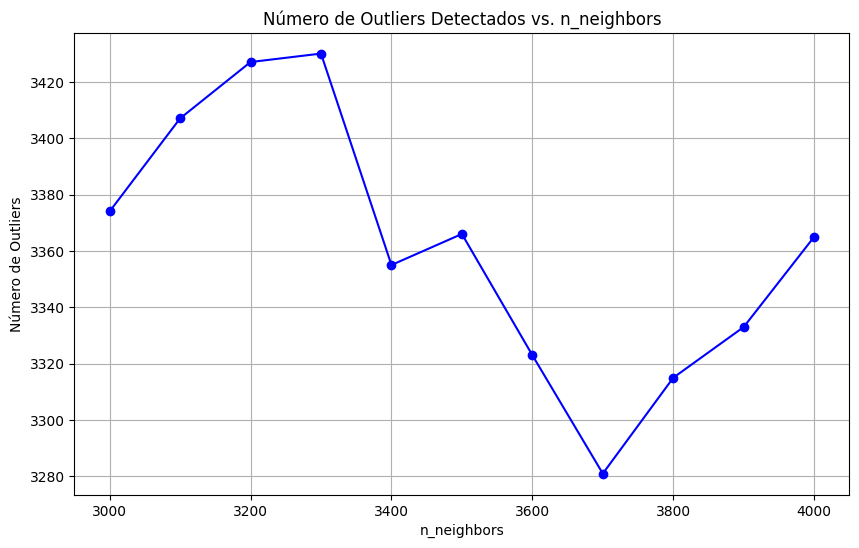

n_neighbors=3000 -> Número de outliers: 3374
n_neighbors=3100 -> Número de outliers: 3407
n_neighbors=3200 -> Número de outliers: 3427
n_neighbors=3300 -> Número de outliers: 3430
n_neighbors=3400 -> Número de outliers: 3355
n_neighbors=3500 -> Número de outliers: 3366
n_neighbors=3600 -> Número de outliers: 3323
n_neighbors=3700 -> Número de outliers: 3281
n_neighbors=3800 -> Número de outliers: 3315
n_neighbors=3900 -> Número de outliers: 3333
n_neighbors=4000 -> Número de outliers: 3365
El valor de n_neighbors con el máximo número de outliers (3430) es: 3300


PROSPECTID     Total_TL  Tot_Closed_TL  Tot_Active_TL  pct_active_tl  \
count   3430.000000  3430.000000    3430.000000    3430.000000    3430.000000   
mean   25755.087172    17.064140      12.548397       4.515743       0.289372   
std    14983.354779    18.932798      16.636854       5.013154       0.309816   
min       16.000000     1.000000       0.000000       0.000000       0.000000   
25%    12816.750000     1.000000       1.000000       0.000000       0.000000   
50%    25939.500000    12.000000       6.000000       3.000000       0.190000   
75%    38700.750000    26.000000      19.000000       8.000000       0.478000   
max    51331.000000   235.000000     216.000000      47.000000       1.000000   

       pct_closed_tl  Tot_Missed_Pmnt      Auto_TL        CC_TL  Consumer_TL  \
count    3430.000000      3430.000000  3430.000000  3430.000000  3430.000000   
mean        0.710628         1.471429     0.730321     0.259184     2.972012   
std         0.309816         2.492257     1.344610     0.926677     5.557917   
min         0.000000         0.000000     0.000000     0.000000     0.000000   
25%         0.522000         0.000000     0.000000     0.000000     0.000000   
50%         0.810000         0.000000     0.000000     0.000000     0.000000   
75%         1.000000         2.000000     1.000000     0.000000     3.000000   
max         1.000000        34.000000    27.000000    27.000000    41.000000   

           Gold_TL      Home_TL        PL_TL   Secured_TL  Unsecured_TL  \
count  3430.000000  3430.000000  3430.000000  3430.000000   3430.000000   
mean      9.156560     0.140233     0.690087    11.881341      5.182799   
std      16.587168     0.549543     1.722813    18.066827      7.587199   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     0.000000     1.000000      0.000000   
50%       0.000000     0.000000     0.000000     2.000000      1.000000   
75%      15.000000     0.000000     1.000000    19.000000      7.000000   
max     235.000000    10.000000    29.000000   235.000000     55.000000   

          Other_TL  Age_Oldest_TL  Age_Newest_TL  Credit_Score  \
count  3430.000000    3430.000000    3430.000000   3430.000000   
mean      3.115743      82.265015      33.987464    685.345773   
std       5.979040      68.617588      54.105538     30.508349   
min       0.000000       2.000000       0.000000    489.000000   
25%       0.000000      25.000000       2.000000    668.000000   
50%       1.000000      60.000000       6.000000    682.000000   
75%       3.000000     122.000000      24.750000    699.000000   
max      80.000000     392.000000     392.000000    811.000000   

       Total_TL_opened_pca  Tot_TL_closed_pca  pct_tl_open_pca  \
count          3430.000000        3430.000000      3430.000000   
mean              1.548734           1.728996        -0.182541   
std               3.089834           3.227553         1.183728   
min              -0.903453          -0.664685        -1.151816   
25%              -0.903453          -0.664685        -1.151816   
50%               0.097463           0.535874        -0.695389   
75%               3.279623           2.936992         0.652367   
max              22.828184          31.871589         3.029903   

       pct_tl_closed_pca  
count        3430.000000  
mean            0.575865  
std             1.943504  
min            -0.718622  
25%            -0.718622  
50%            -0.304076  
75%             0.885501  
max             5.468623

In [ ]:
# Rango de valores para n_neighbors
neighbors_range = range(3000,3401, 100)
outlier_counts = []

# Evaluar LOF para diferentes valores de n_neighbors
for n in neighbors_range:
    lof = LocalOutlierFactor(n_neighbors=n)
    y_pred = lof.fit_predict(internal[numeric_features])
    outliers = np.where(y_pred == -1)[0]
    outlier_counts.append(len(outliers))

# Graficar el número de outliers detectados en función de n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, outlier_counts, marker='o', linestyle='-', color='b')
plt.title('Número de Outliers Detectados vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Número de Outliers')
plt.grid(True)
plt.show()

# Crear un diccionario para almacenar los valores de n_neighbors y sus correspondientes outliers
outliers_dict = {}

# Imprimir la cantidad de outliers detectados para cada valor de n_neighbors
for n, count in zip(neighbors_range, outlier_counts):
    print(f'n_neighbors={n} -> Número de outliers: {count}')
    outliers_dict[n] = count  # Agregar el valor de n y su count al diccionario

# Encontrar el valor de n_neighbors donde el count es máximo
max_n = max(outliers_dict, key=outliers_dict.get)  # Este es el n_neighbors con el máximo count
max_count = outliers_dict[max_n]  # Este es el valor de count correspondiente

# Imprimir el resultado
print(f'El valor de n_neighbors con el máximo número de outliers ({max_count}) es: {max_n}')

# Crear el modelo LOF con el valor de n_neighbors donde count es máximo
lof = LocalOutlierFactor(n_neighbors=max_n)

# Ajustar el modelo y predecir
y_pred = lof.fit_predict(internal[numeric_features])

# Obtener los índices de los outliers
outliers = np.where(y_pred == -1)[0]  # Selecciona solo la primera parte de la tupla

# Filtrar los valores atípicos en el DataFrame
outlier_values = internal.iloc[outliers]

outlier_values.describe()

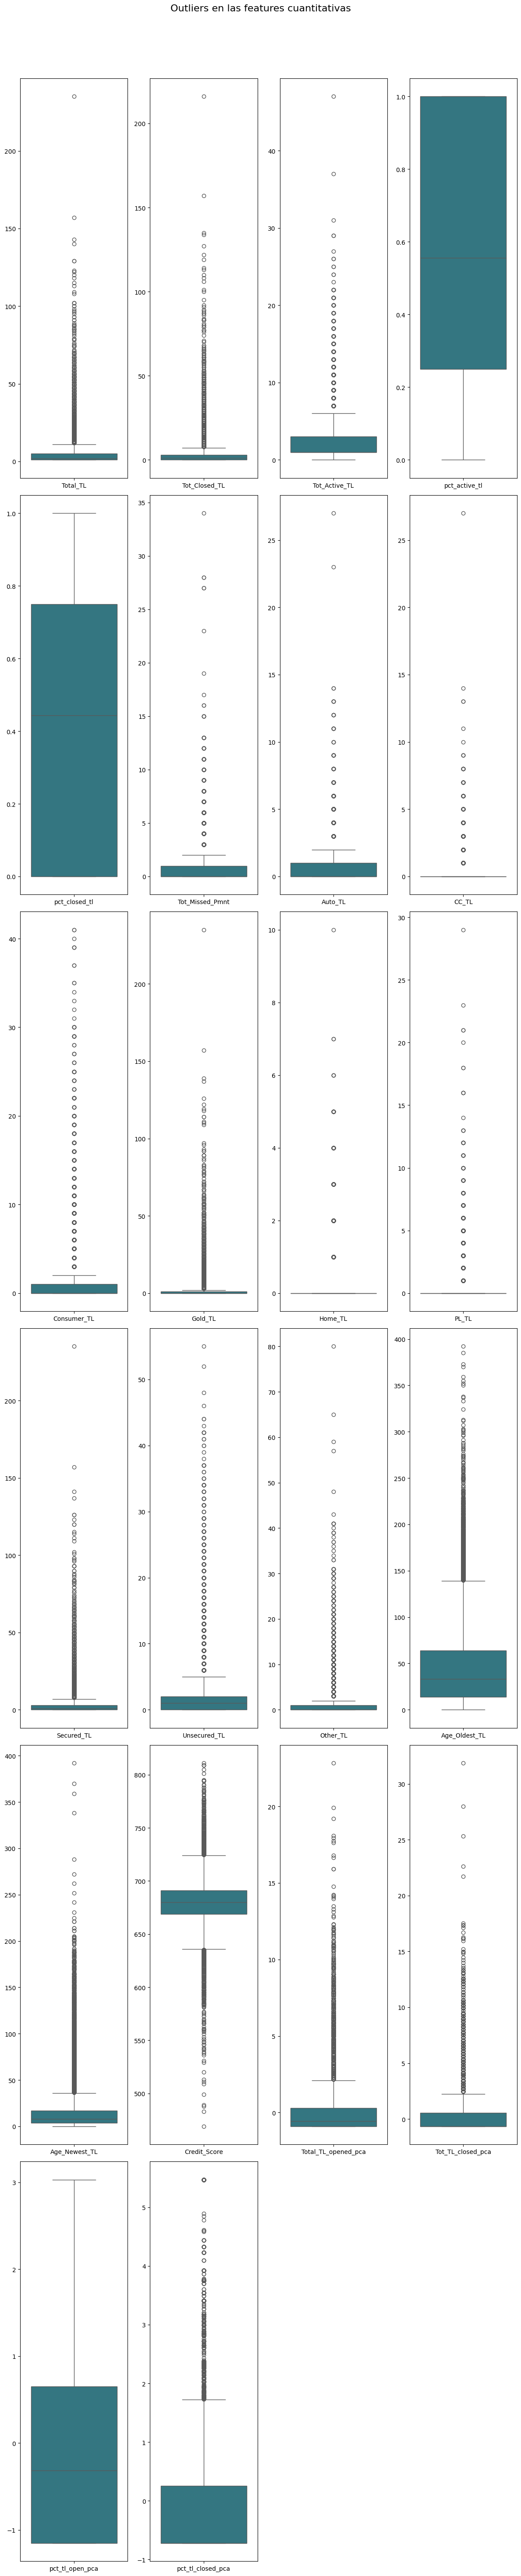

In [17]:
def plot_outliers_boxplots(df, numeric_features, palette='Set2', figsize=(12, 60)):
    """
    Dibuja boxplots para detectar outliers en las características numéricas.

    Parámetros:
    df: DataFrame que contiene los datos a visualizar.
    numeric_features: Lista de nombres de las columnas numéricas a analizar.
    palette: Paleta de colores para los gráficos (por defecto 'Set2').
    figsize: Tamaño de la figura para los subgráficos (por defecto (12, 60)).
    """
    # Configuración de estilo
    sns.set_palette(palette)

    color_viridis = sns.color_palette('viridis')[2]
    plt.figure(figsize=figsize)

    # Dibujar un boxplot por cada columna numérica
    for i, column in enumerate(numeric_features):
        plt.subplot(7, 3, i + 1)
        sns.boxplot(data=df[[column]], color=color_viridis) 

    # Mostrar título y ajustar el layout
    plt.suptitle('Outliers en las features cuantitativas', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Llamada a la función
plot_outliers_boxplots(internal, numeric_features)

#### 2.3.2. Imputación de Outliers

ESTUDIAR VARIABLES CC_TL, HOME_TL Y PL_TL, VALORAR SU DISCRETIZACIÓN

#### 2.3.3. Transformación de las distribuciones

In [18]:
# Inicializar listas para variables transformadas
log_transformed = []
yeo_johnson_transformed = []

# Iterar sobre las características numéricas
for col in numeric_features:
    series = internal[col]
    
    # Si la asimetría es mayor que 1.5, aplicar transformación logarítmica
    if skew(series) > 1.5:
        internal[col] = np.log1p(series)
        log_transformed.append(col)
    
    # Si es un flotante, aplicar transformación Box-Cox
    else:
        yeo_johnson = PowerTransformer(method='yeo-johnson')
        internal[col] = yeo_johnson.fit_transform(series.values.reshape(-1, 1)).flatten()
        yeo_johnson_transformed.append(col)

# Imprimir las listas de variables transformadas
print(f'Variables transformadas con logaritmo: {log_transformed}')
print(f'Variables transformadas con Yeo-Johnson: {yeo_johnson_transformed}')

Variables transformadas con logaritmo: ['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'Total_TL_opened_pca', 'Tot_TL_closed_pca', 'pct_tl_closed_pca']
Variables transformadas con Yeo-Johnson: ['pct_active_tl', 'pct_closed_tl', 'Credit_Score', 'pct_tl_open_pca']


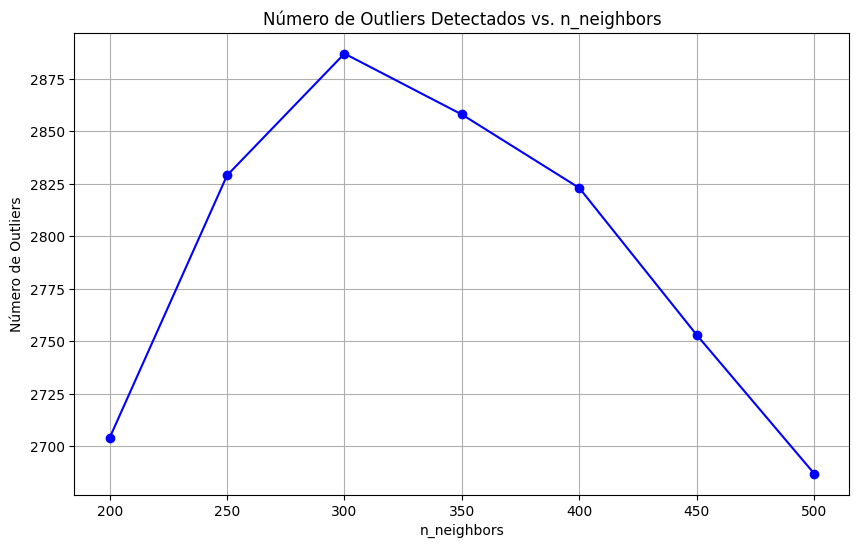

n_neighbors=200 -> Número de outliers: 2704
n_neighbors=250 -> Número de outliers: 2829
n_neighbors=300 -> Número de outliers: 2887
n_neighbors=350 -> Número de outliers: 2858
n_neighbors=400 -> Número de outliers: 2823
n_neighbors=450 -> Número de outliers: 2753
n_neighbors=500 -> Número de outliers: 2687
El valor de n_neighbors con el máximo número de outliers (2887) es: 300


In [19]:
# Rango de valores para n_neighbors
neighbors_range = range(200, 501, 50)
outlier_counts = []

# Evaluar LOF para diferentes valores de n_neighbors
for n in neighbors_range:
    lof = LocalOutlierFactor(n_neighbors=n)
    y_pred = lof.fit_predict(internal[numeric_features])
    outliers = np.where(y_pred == -1)[0]
    outlier_counts.append(len(outliers))

# Graficar el número de outliers detectados en función de n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, outlier_counts, marker='o', linestyle='-', color='b')
plt.title('Número de Outliers Detectados vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Número de Outliers')
plt.grid(True)
plt.show()

# Crear un diccionario para almacenar los valores de n_neighbors y sus correspondientes outliers
outliers_dict = {}

# Imprimir la cantidad de outliers detectados para cada valor de n_neighbors
for n, count in zip(neighbors_range, outlier_counts):
    print(f'n_neighbors={n} -> Número de outliers: {count}')
    outliers_dict[n] = count  # Agregar el valor de n y su count al diccionario

# Encontrar el valor de n_neighbors donde el count es máximo
max_n = max(outliers_dict, key=outliers_dict.get)
max_count = outliers_dict[max_n] 

# Imprimir el resultado
print(f'El valor de n_neighbors con el máximo número de outliers ({max_count}) es: {max_n}')

# Crear el modelo LOF con el valor de n_neighbors donde count es máximo
lof = LocalOutlierFactor(n_neighbors=max_n)

# Ajustar el modelo y predecir
y_pred = lof.fit_predict(internal[numeric_features])

# Obtener los índices de los outliers
outliers = np.where(y_pred == -1)[0]

# Filtrar los valores atípicos en el DataFrame
outlier_values = internal.iloc[outliers]

In [20]:
# Aplicamos normalización excalando los datos en un rango de  a 1
scaler = MinMaxScaler()
internal[numeric_features] = scaler.fit_transform(internal[numeric_features])
internal['Credit_Score'] = scaler.fit_transform(internal[['Credit_Score']])

## 3. Análisis Univariante

In [21]:
def Count_Quant(df, quant_feat):
    # Encabezado
    print()
    print()
    formatted_text = f'**{quant_feat.upper()}**'
    try:
        from IPython.display import display, Markdown
        display(Markdown(formatted_text))
    except:
        print(formatted_text)

    # Estadísticos descriptivos
    print('Estadísticos')
    print()
    print(f'Mínimo: {round(df[quant_feat].min(),2)}')
    print(f'Máximo: {round(df[quant_feat].max(),2)}')
    print(f'Promedio: {round(df[quant_feat].mean(), 2)}')
    print(f'Std.dev: {round(df[quant_feat].std(),2)}')
    print()
    print(f'Histograma y Boxplot de {quant_feat}.')      

    # Configuración de estilo
    color = '#EE9414'
    sns.set(style='whitegrid')
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 7))

    # Histograma con KDE corregido
    sns.histplot(data=df, x=quant_feat, ax=axes[0], kde=True, color=color, kde_kws={'bw_adjust': 0.3, 'clip': (0, 1)})
    axes[0].set_xlabel('')
    axes[0].set_xlim(0, 1)  # Limitar eje X

    # Boxplot
    sns.boxplot(data=df, x=quant_feat, ax=axes[1], color=color)
    axes[1].set_xlabel('')
    axes[1].set_xlim(0, 1)  # Limitar eje X

    # Mostrar gráficos
    plt.tight_layout()
    plt.show()


**TOTAL_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.15
Std.dev: 0.15

Histograma y Boxplot de Total_TL.


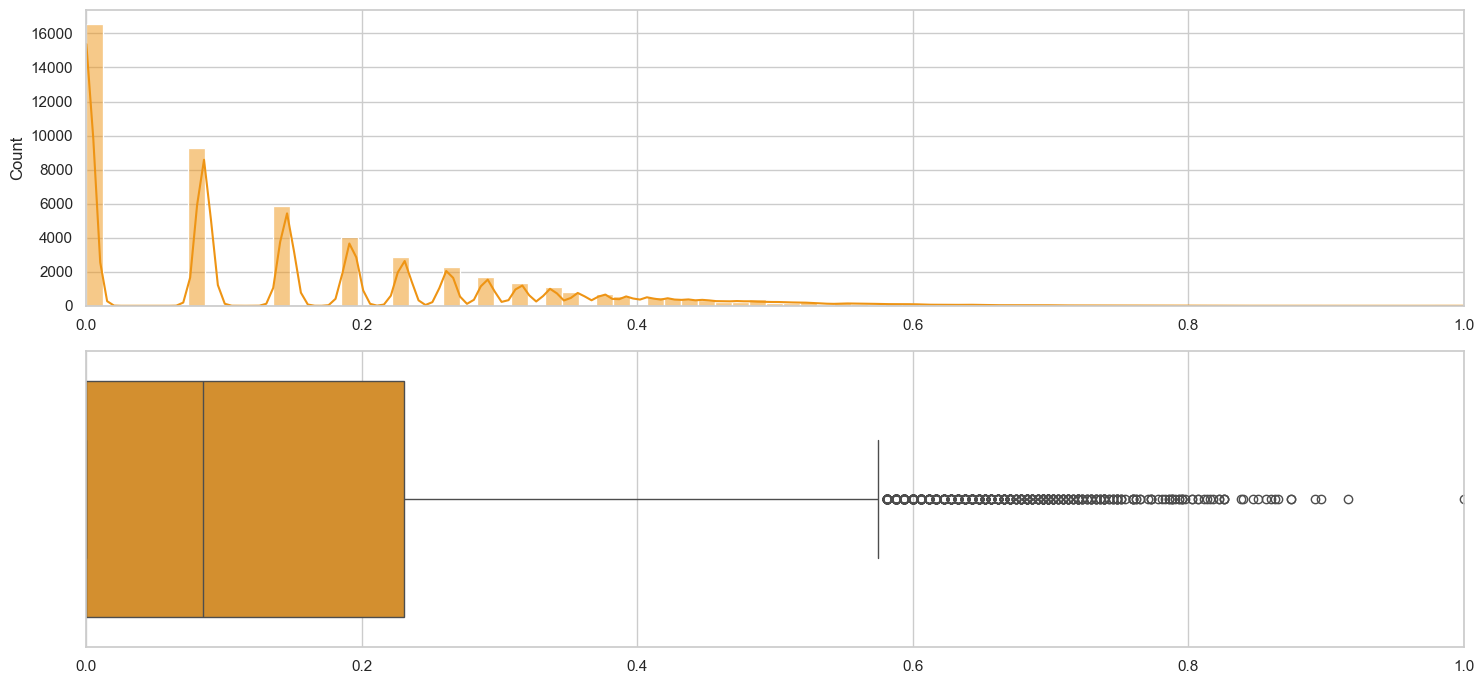

**TOT_CLOSED_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.16
Std.dev: 0.16

Histograma y Boxplot de Tot_Closed_TL.


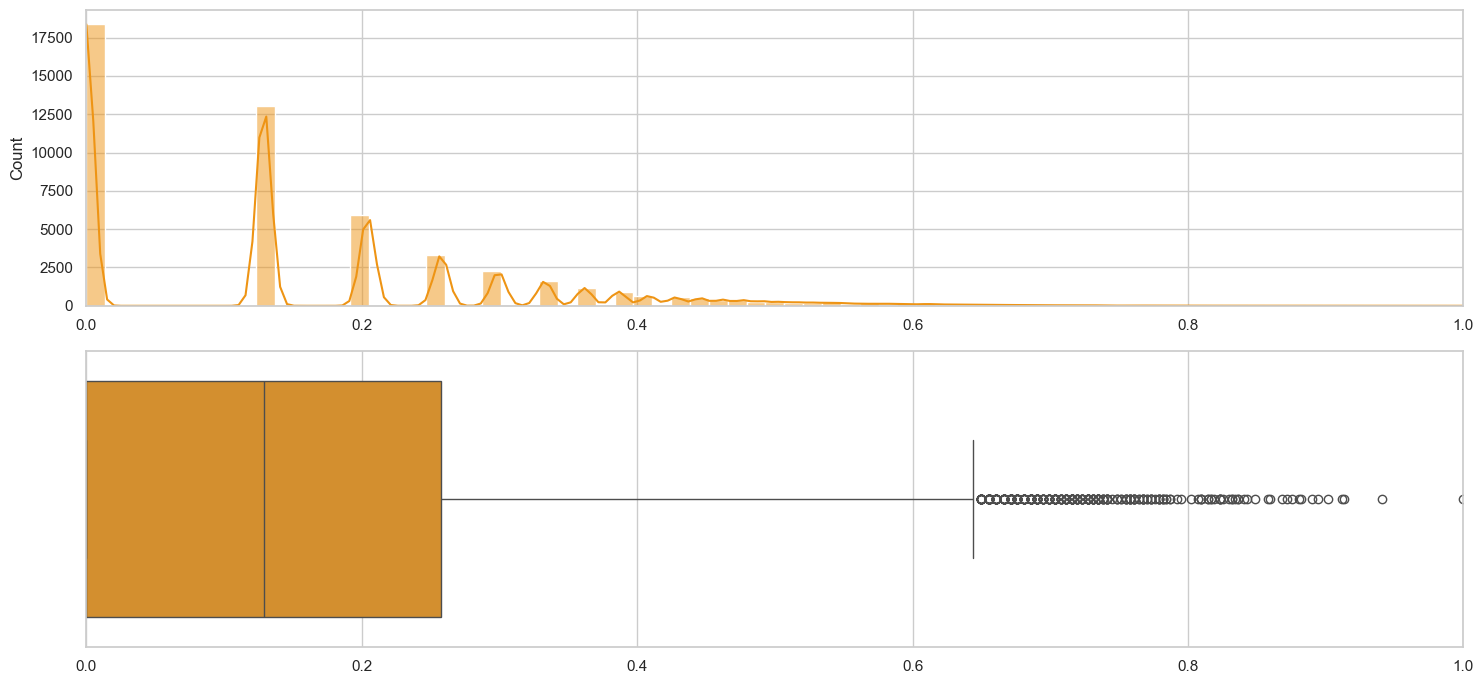

**TOT_ACTIVE_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.24
Std.dev: 0.16

Histograma y Boxplot de Tot_Active_TL.


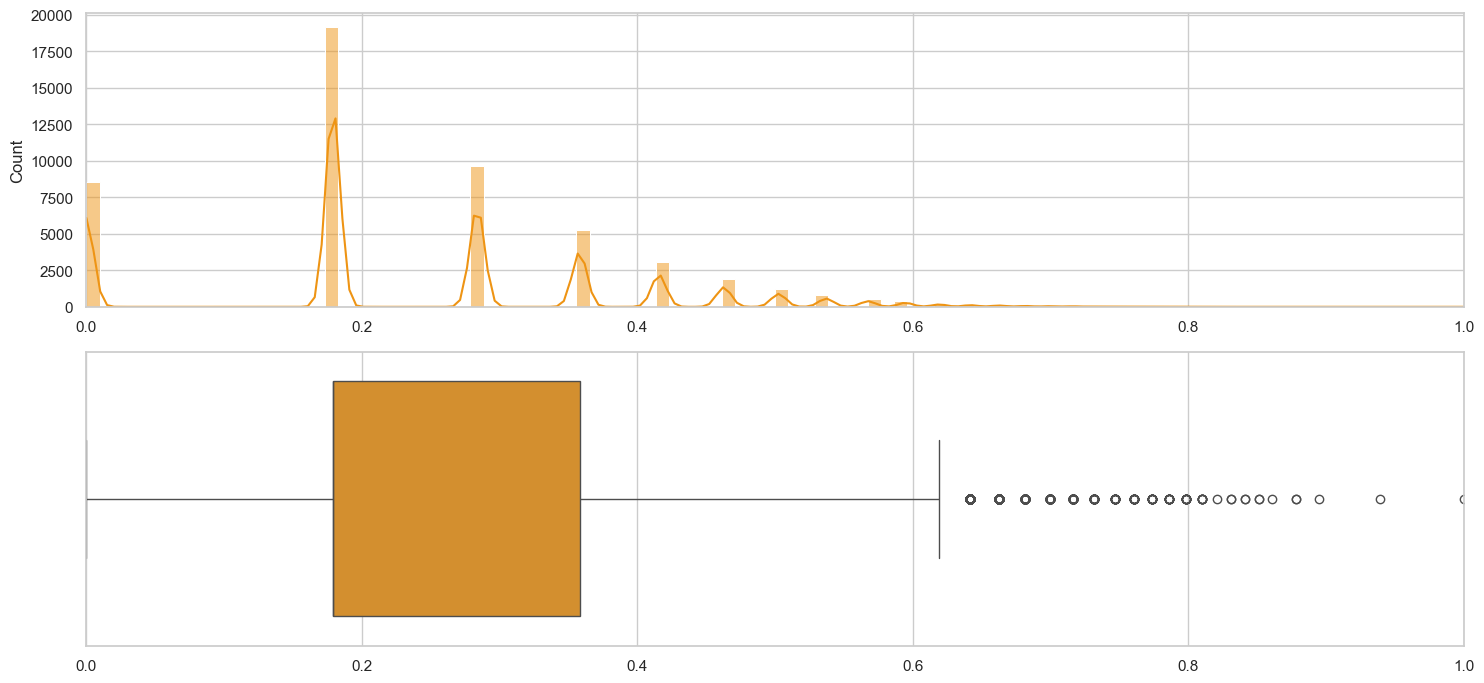

**PCT_ACTIVE_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.57
Std.dev: 0.38

Histograma y Boxplot de pct_active_tl.


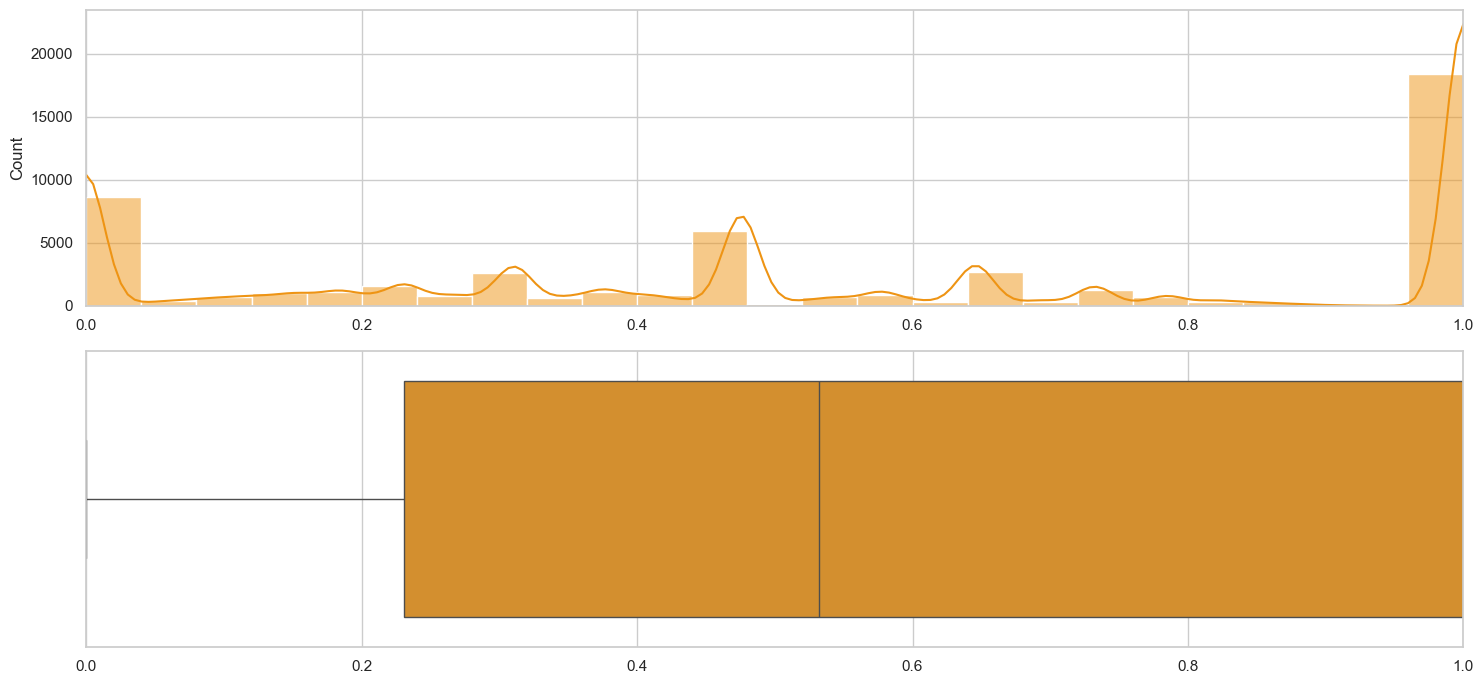

**PCT_CLOSED_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.46
Std.dev: 0.39

Histograma y Boxplot de pct_closed_tl.


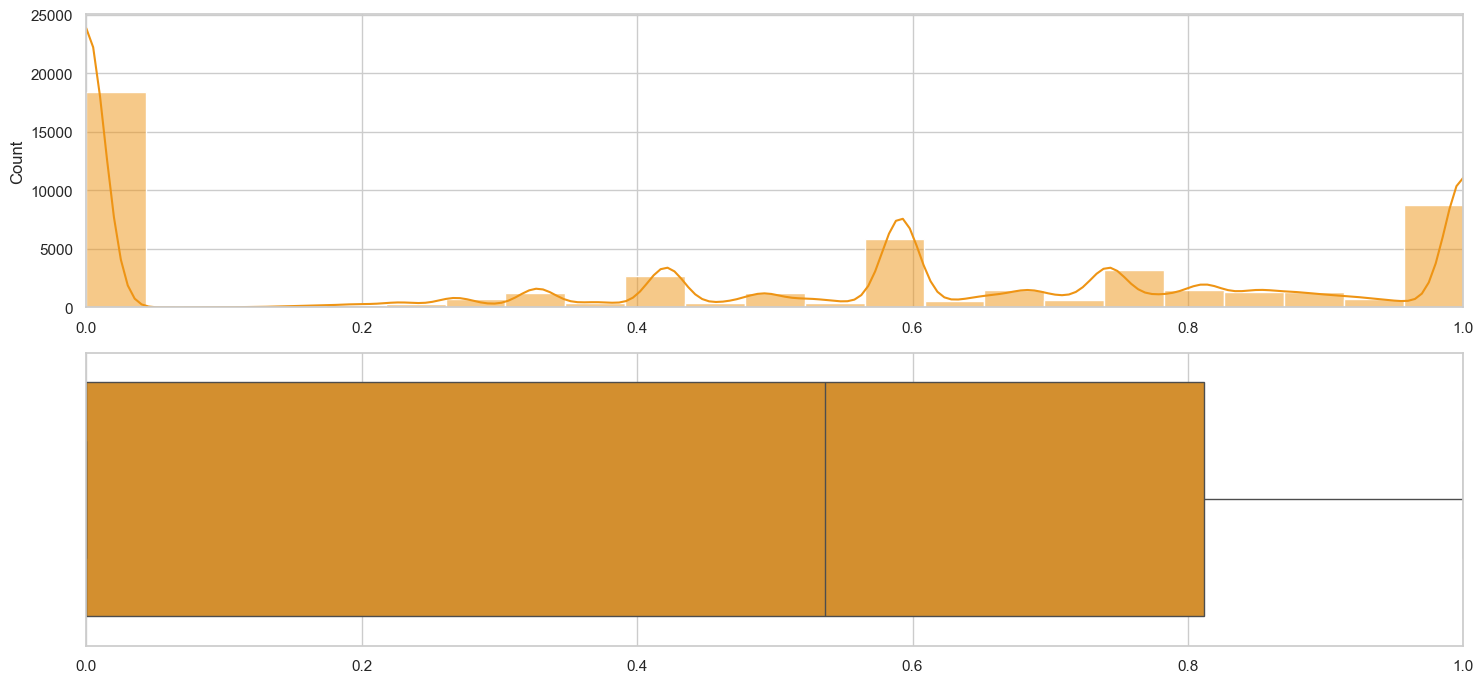

**TOT_MISSED_PMNT**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.08
Std.dev: 0.13

Histograma y Boxplot de Tot_Missed_Pmnt.


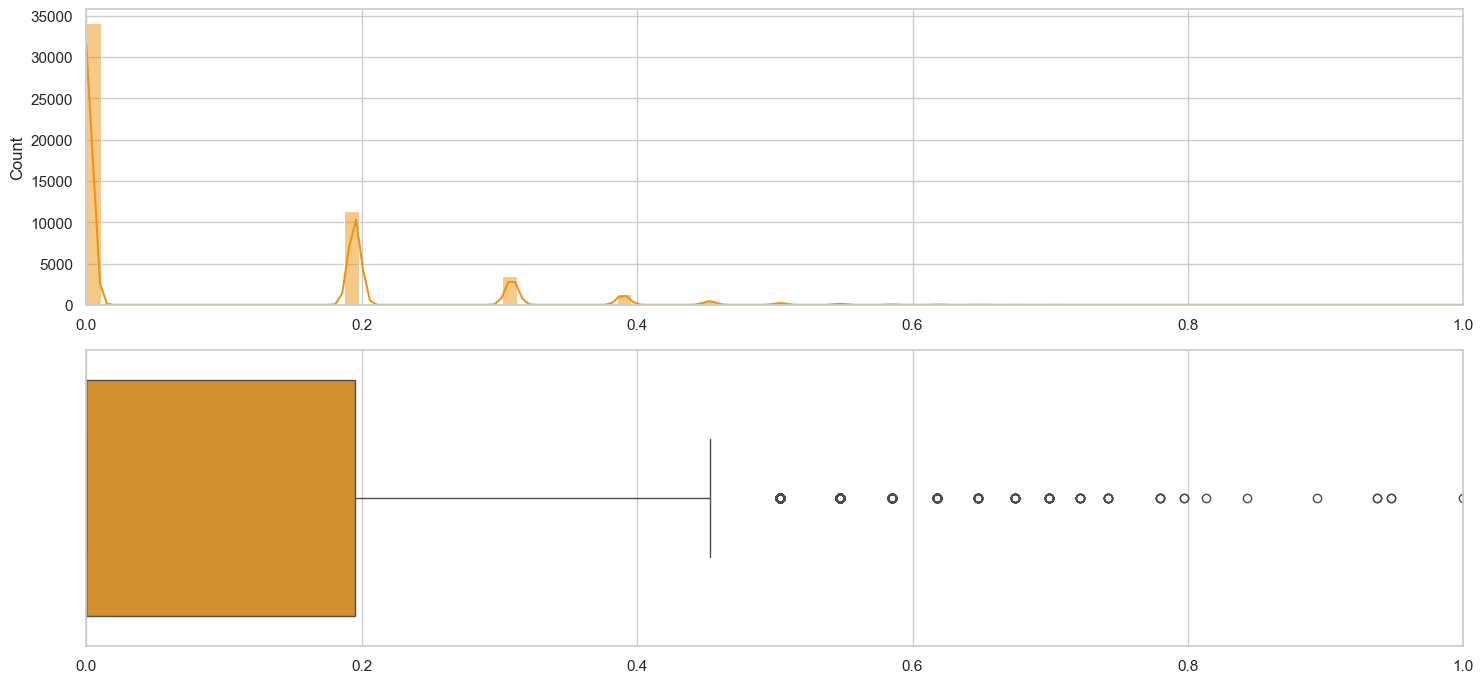

**AUTO_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.11
Std.dev: 0.13

Histograma y Boxplot de Auto_TL.


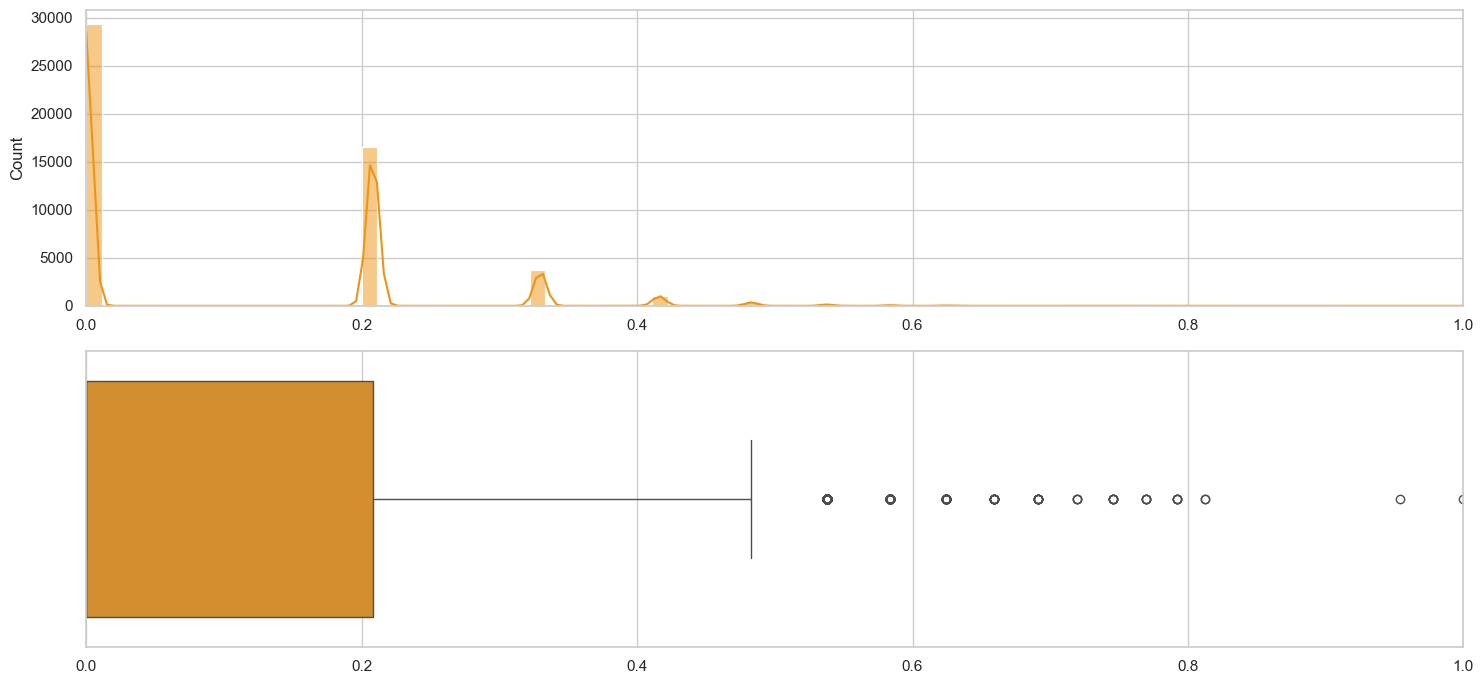

**CC_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.02
Std.dev: 0.07

Histograma y Boxplot de CC_TL.


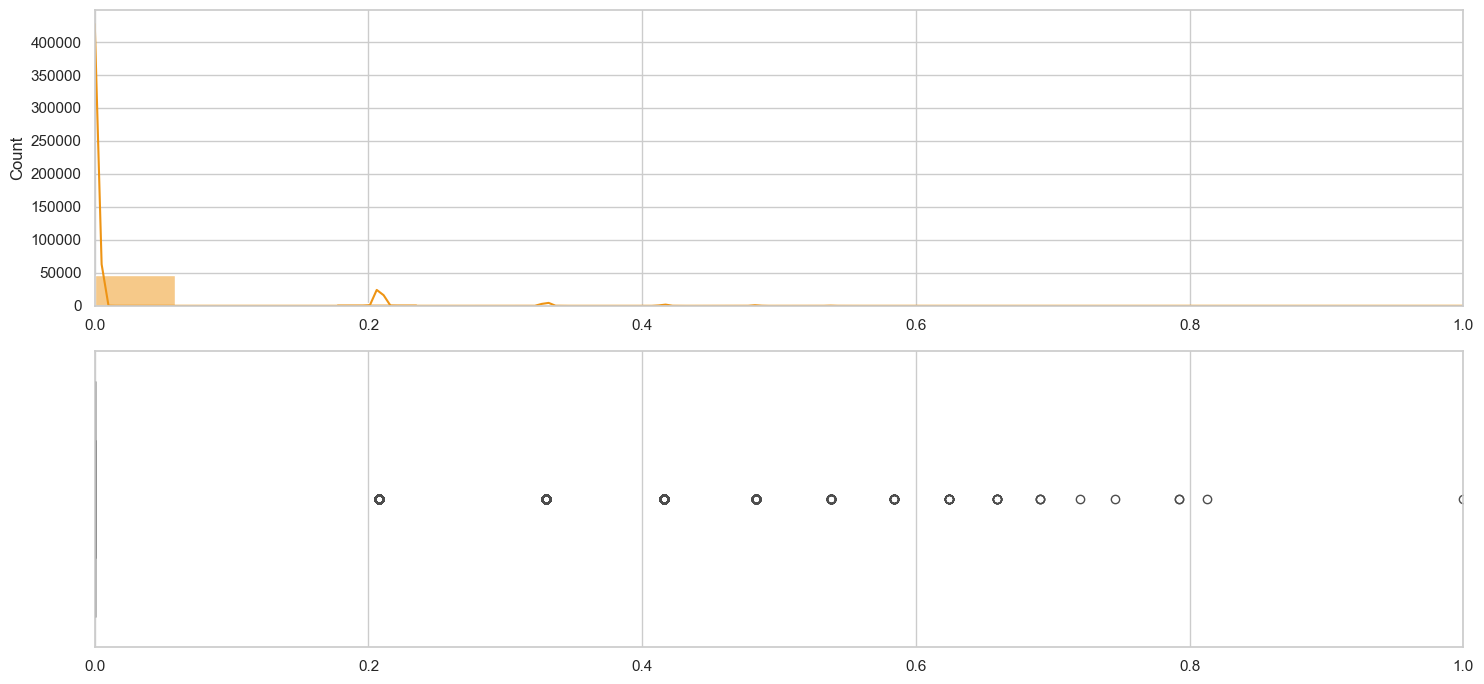

**CONSUMER_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.13
Std.dev: 0.17

Histograma y Boxplot de Consumer_TL.


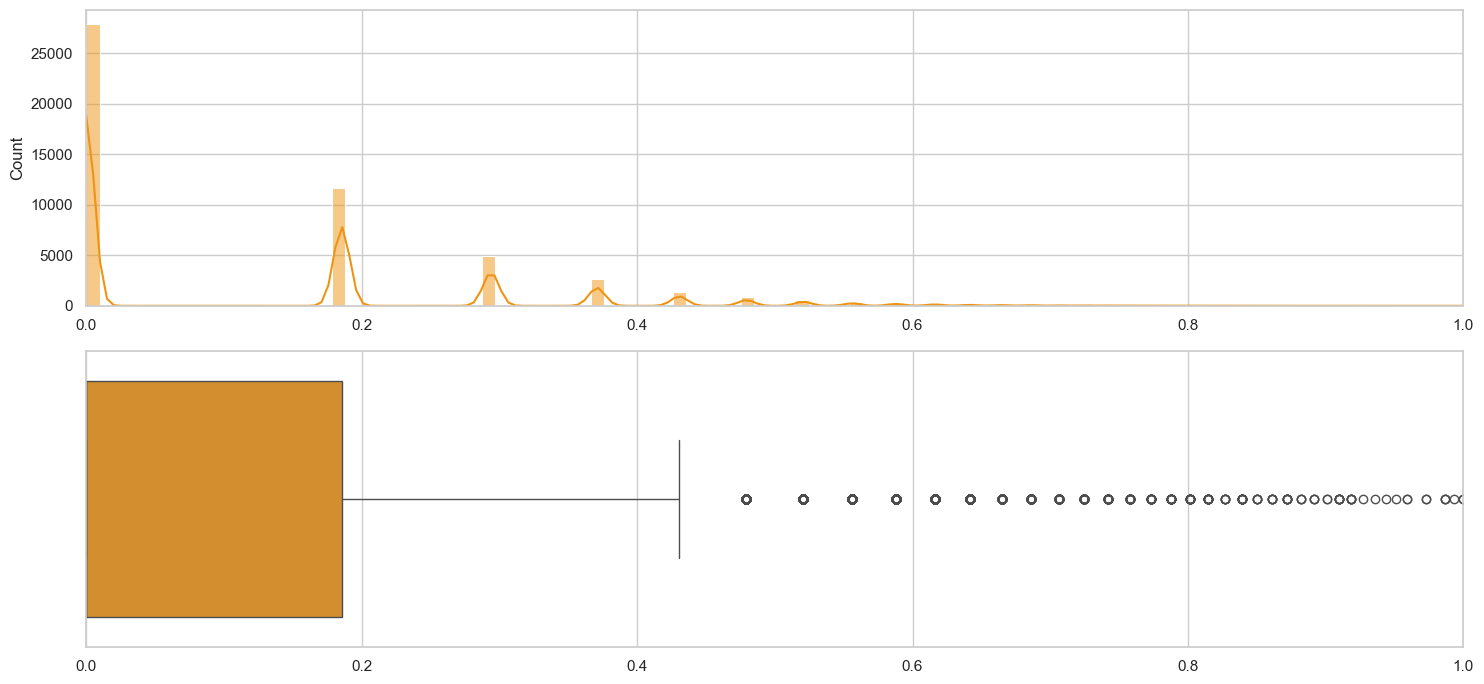

**GOLD_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.08
Std.dev: 0.14

Histograma y Boxplot de Gold_TL.


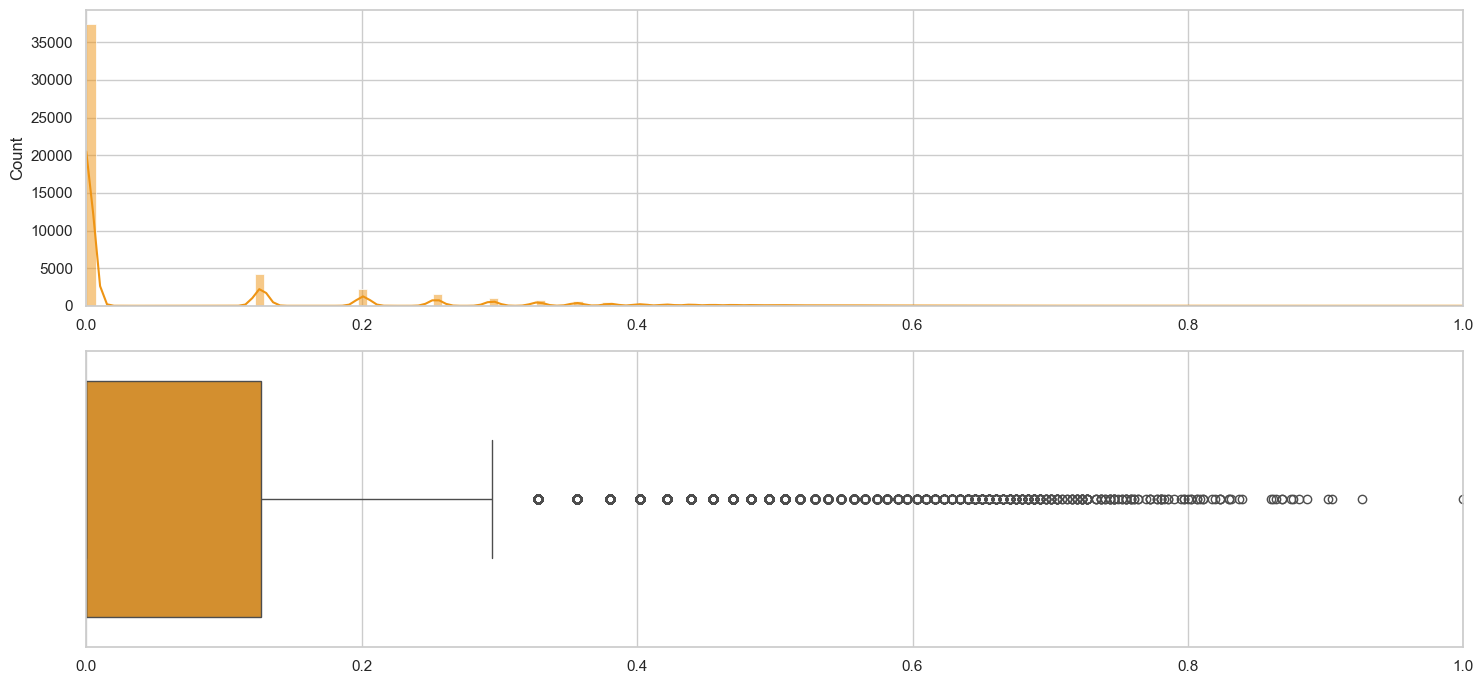

**HOME_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.02
Std.dev: 0.08

Histograma y Boxplot de Home_TL.


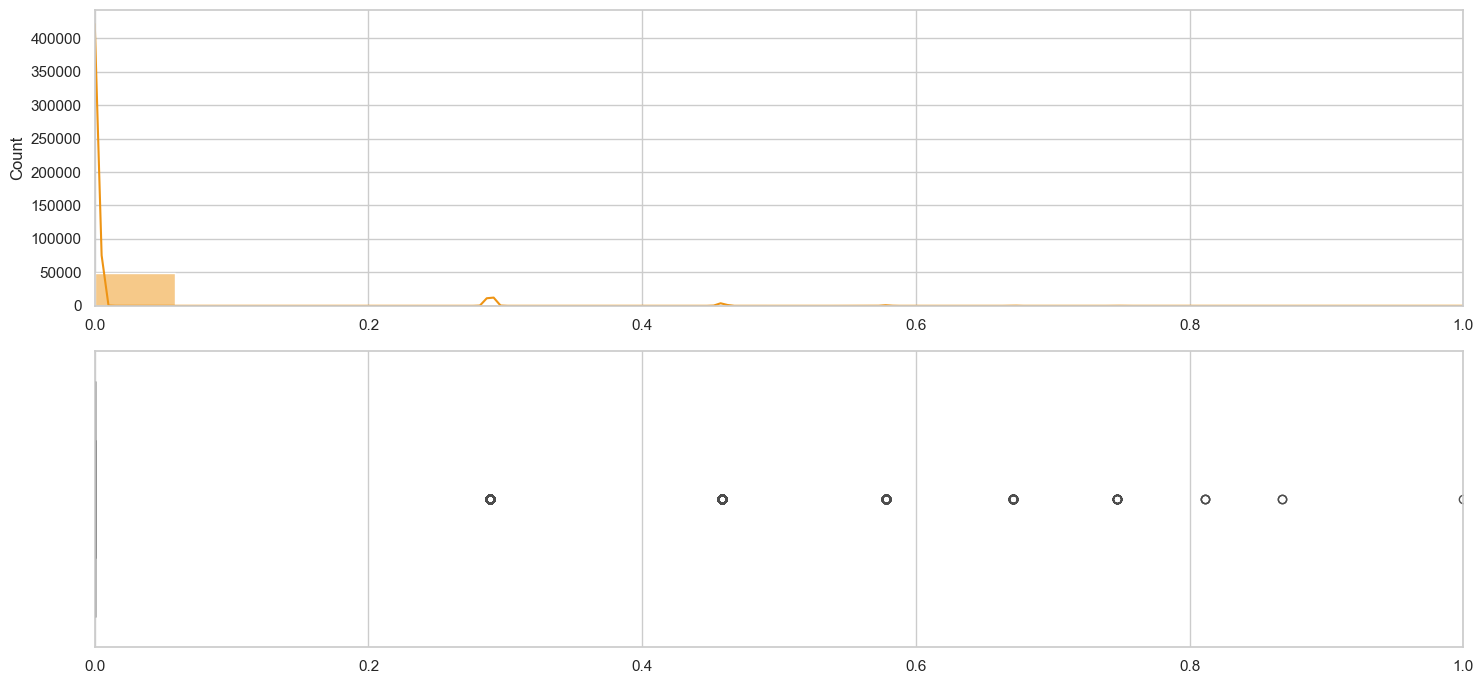

**PL_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.04
Std.dev: 0.11

Histograma y Boxplot de PL_TL.


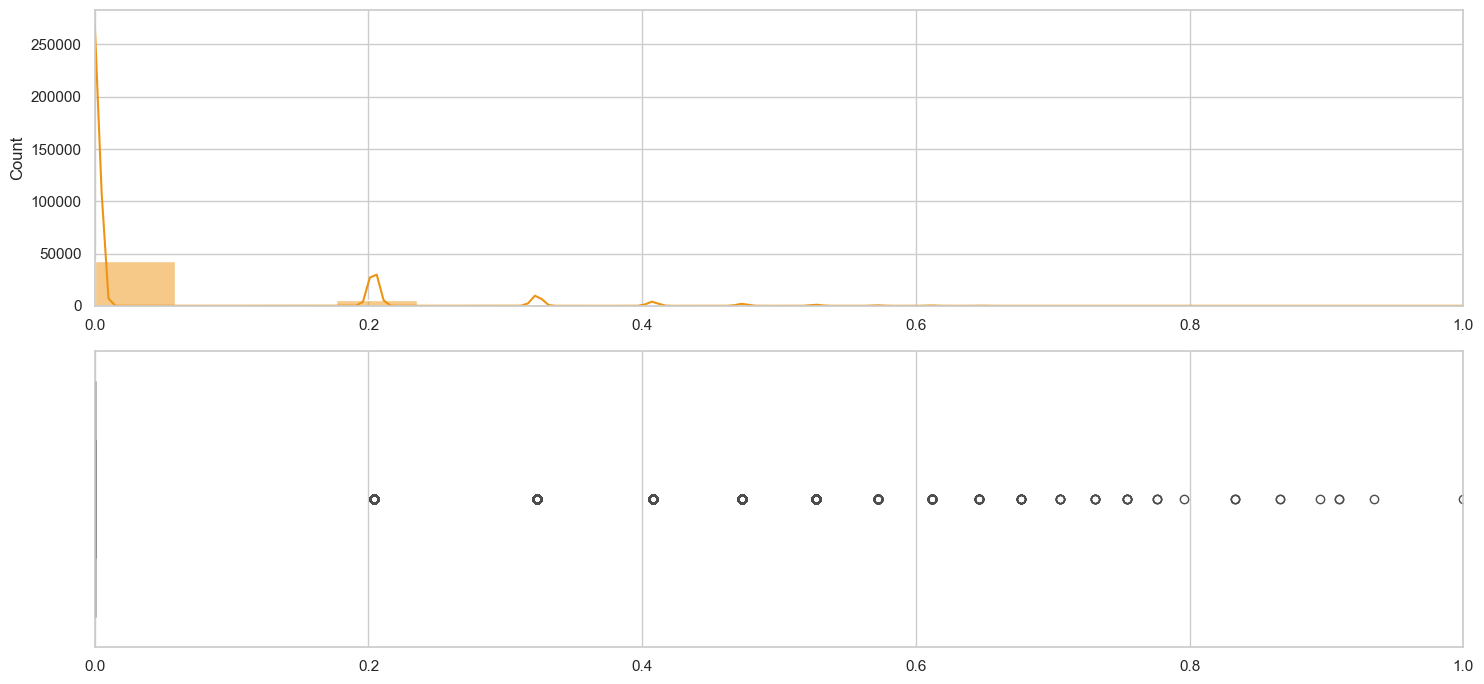

**SECURED_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.16
Std.dev: 0.15

Histograma y Boxplot de Secured_TL.


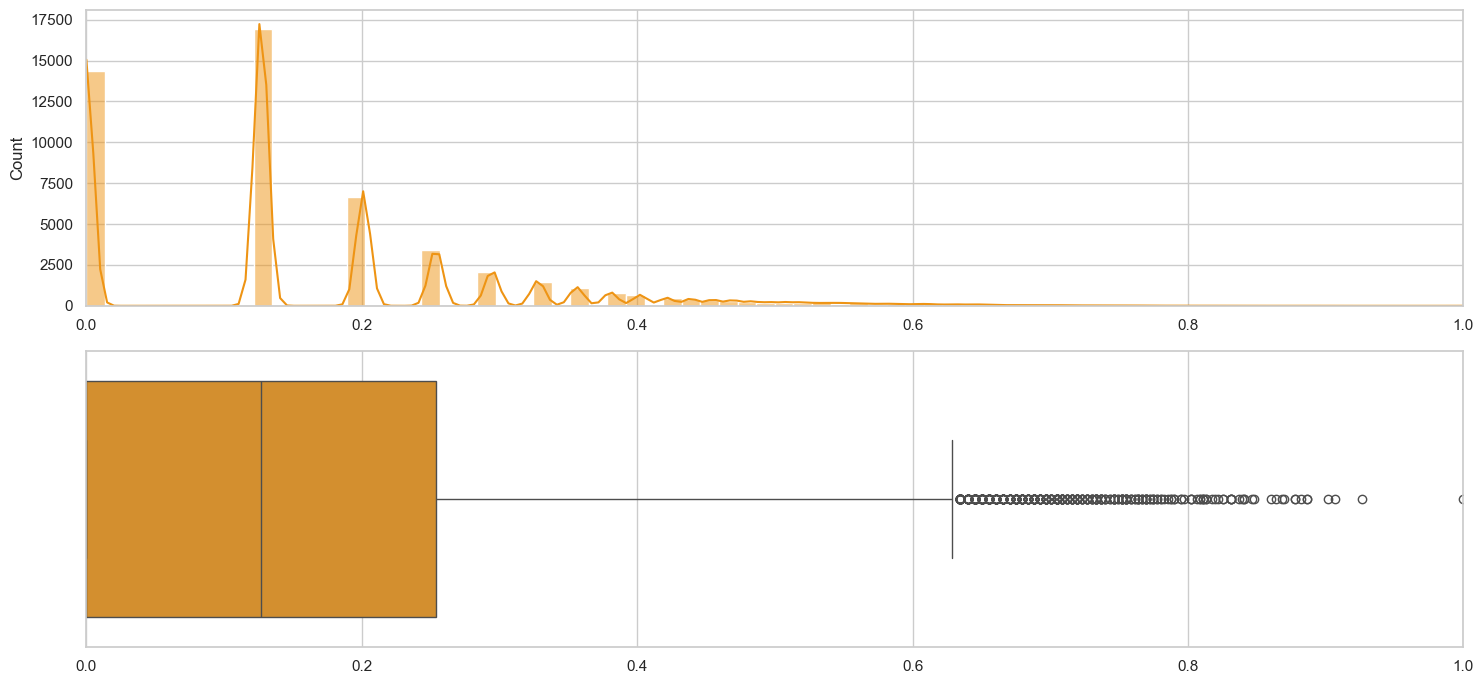

**UNSECURED_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.19
Std.dev: 0.18

Histograma y Boxplot de Unsecured_TL.


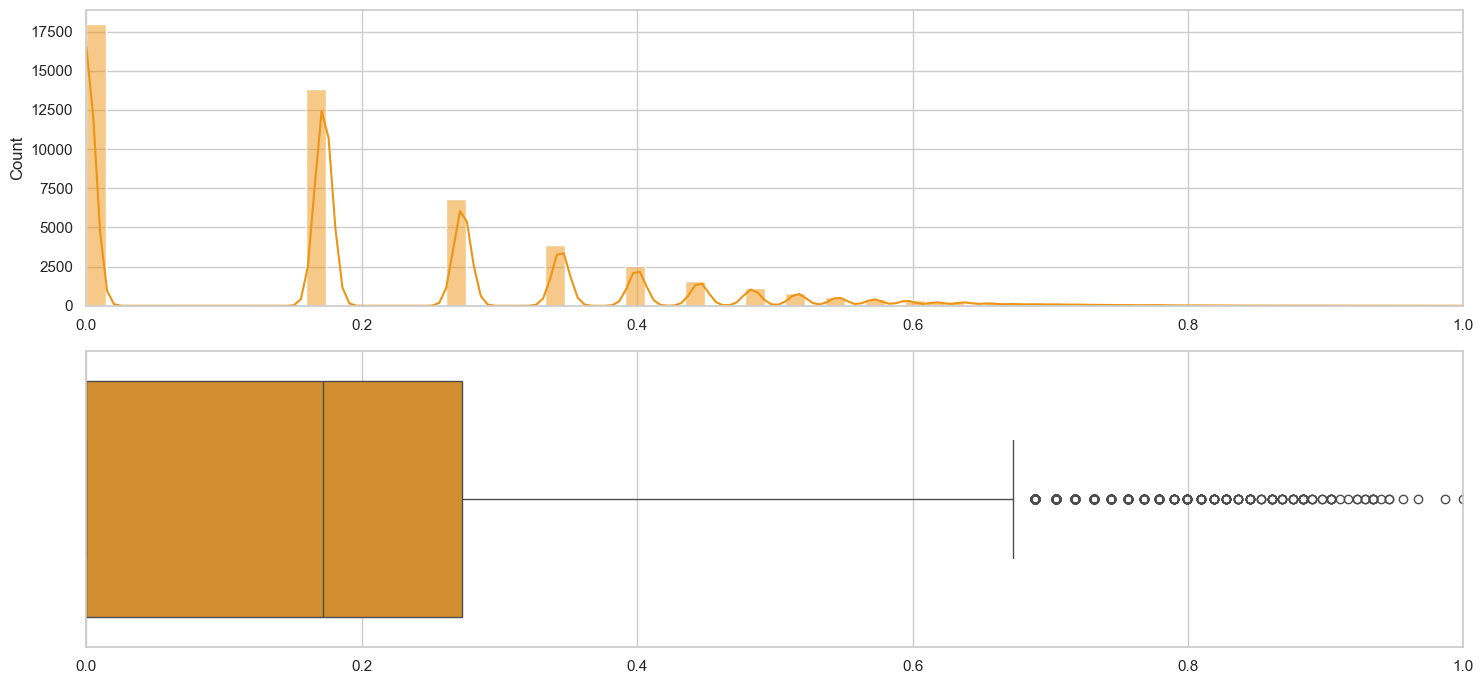

**OTHER_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.11
Std.dev: 0.14

Histograma y Boxplot de Other_TL.


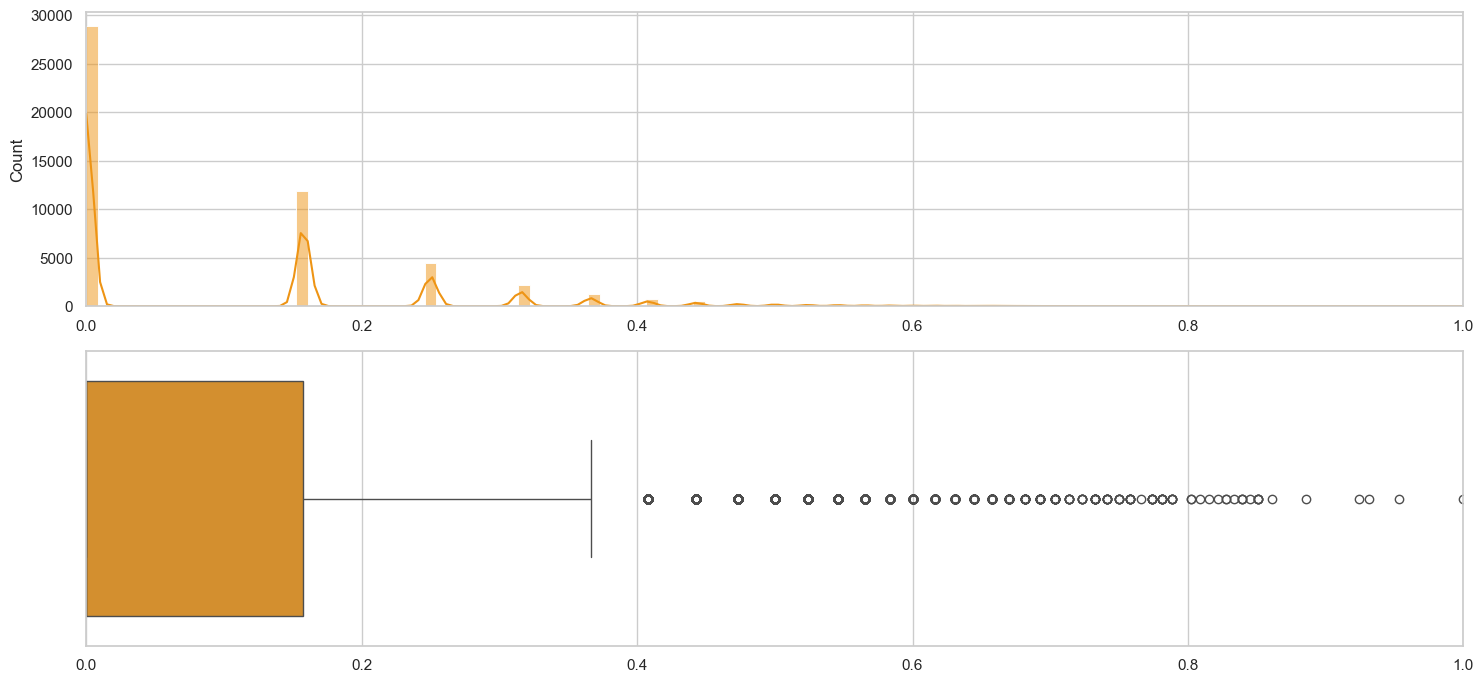

**AGE_OLDEST_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.57
Std.dev: 0.16

Histograma y Boxplot de Age_Oldest_TL.


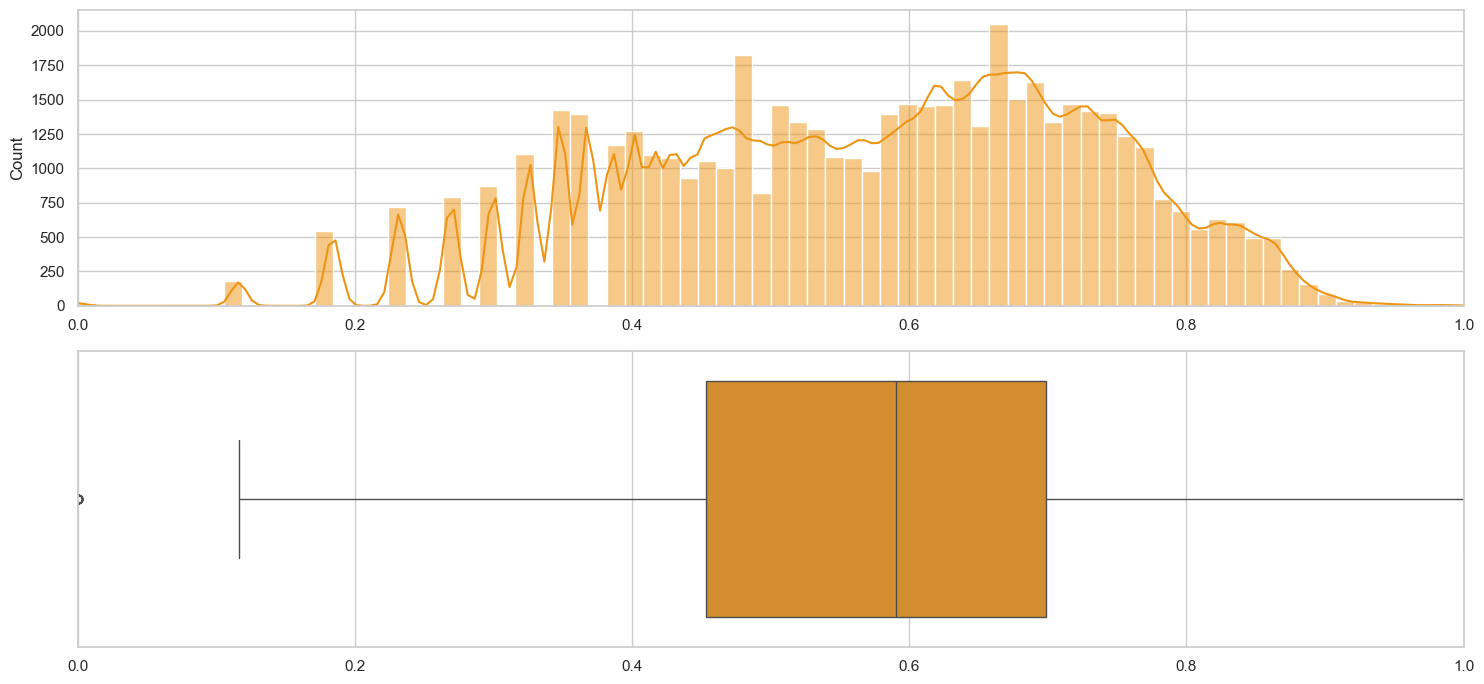

**AGE_NEWEST_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.39
Std.dev: 0.16

Histograma y Boxplot de Age_Newest_TL.


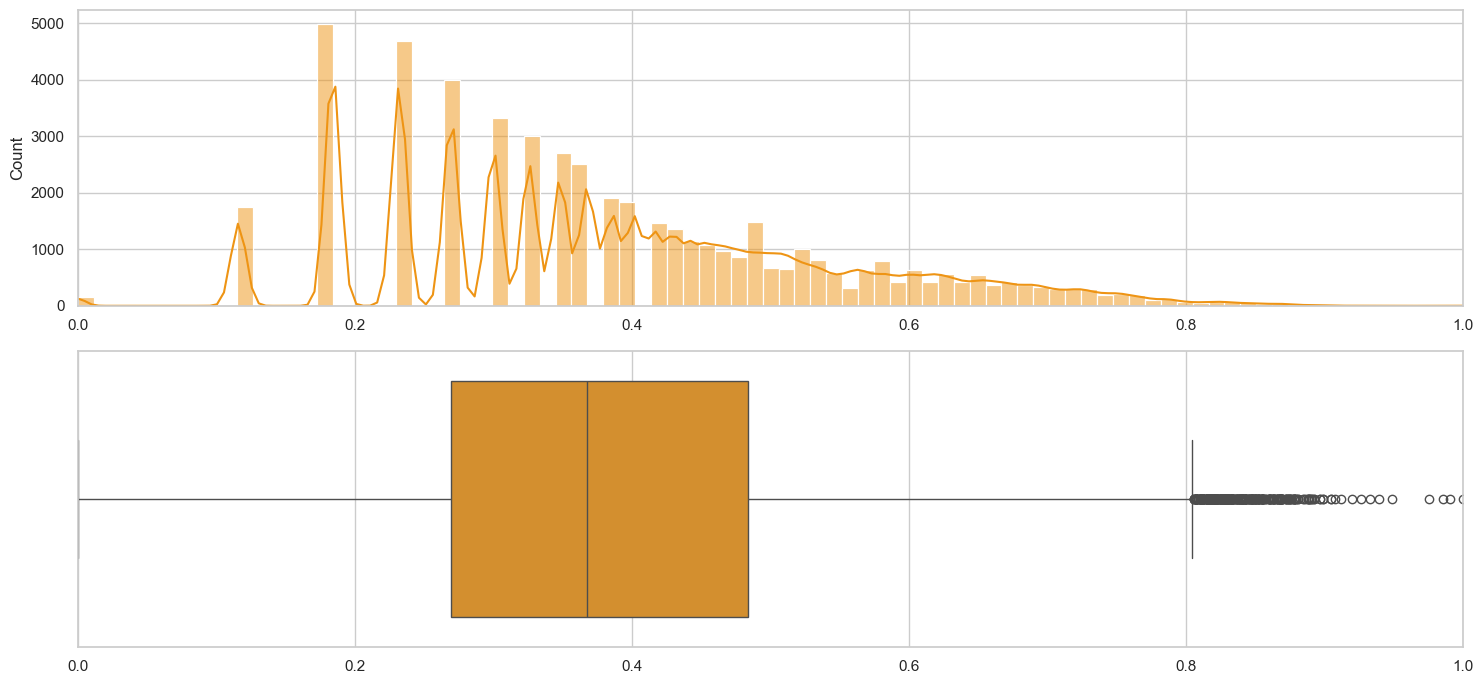

**CREDIT_SCORE**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.58
Std.dev: 0.06

Histograma y Boxplot de Credit_Score.


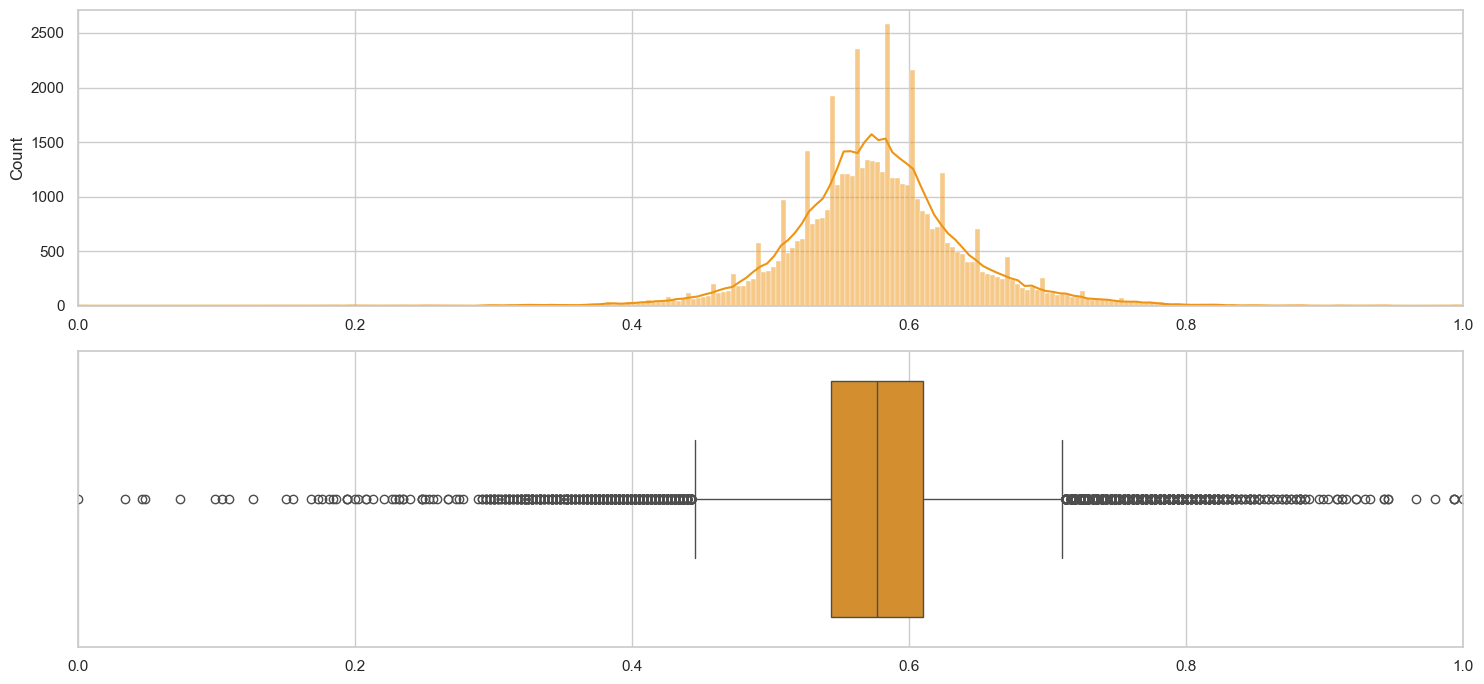

**TOTAL_TL_OPENED_PCA**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.28
Std.dev: 0.24

Histograma y Boxplot de Total_TL_opened_pca.


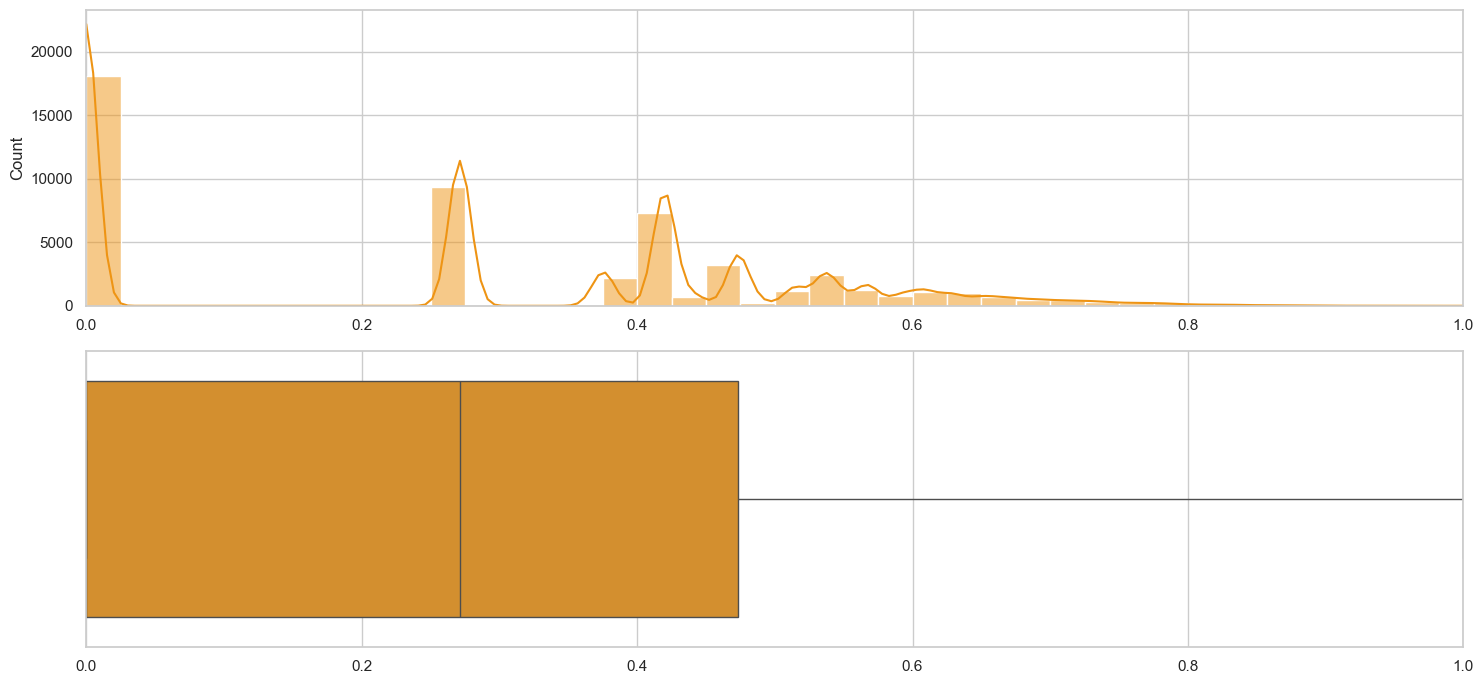

**TOT_TL_CLOSED_PCA**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.13
Std.dev: 0.19

Histograma y Boxplot de Tot_TL_closed_pca.


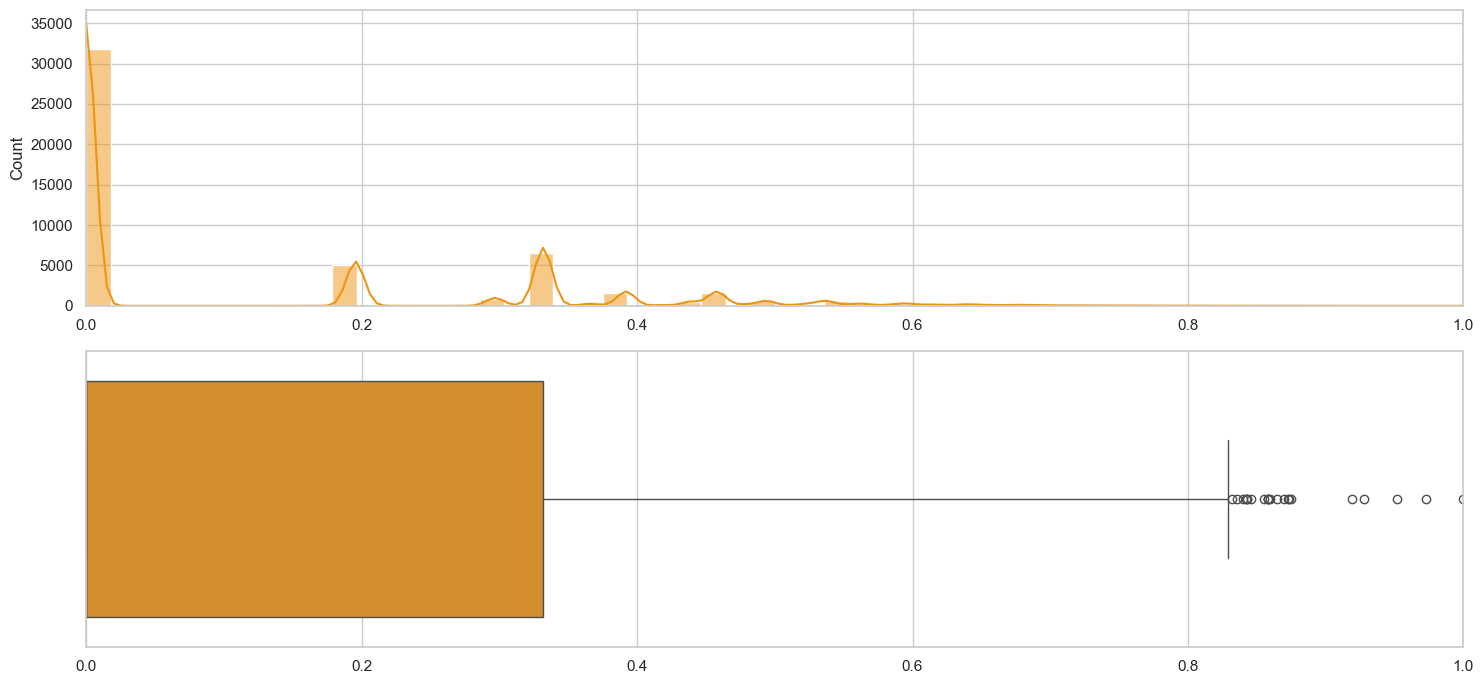

**PCT_TL_OPEN_PCA**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.38
Std.dev: 0.35

Histograma y Boxplot de pct_tl_open_pca.


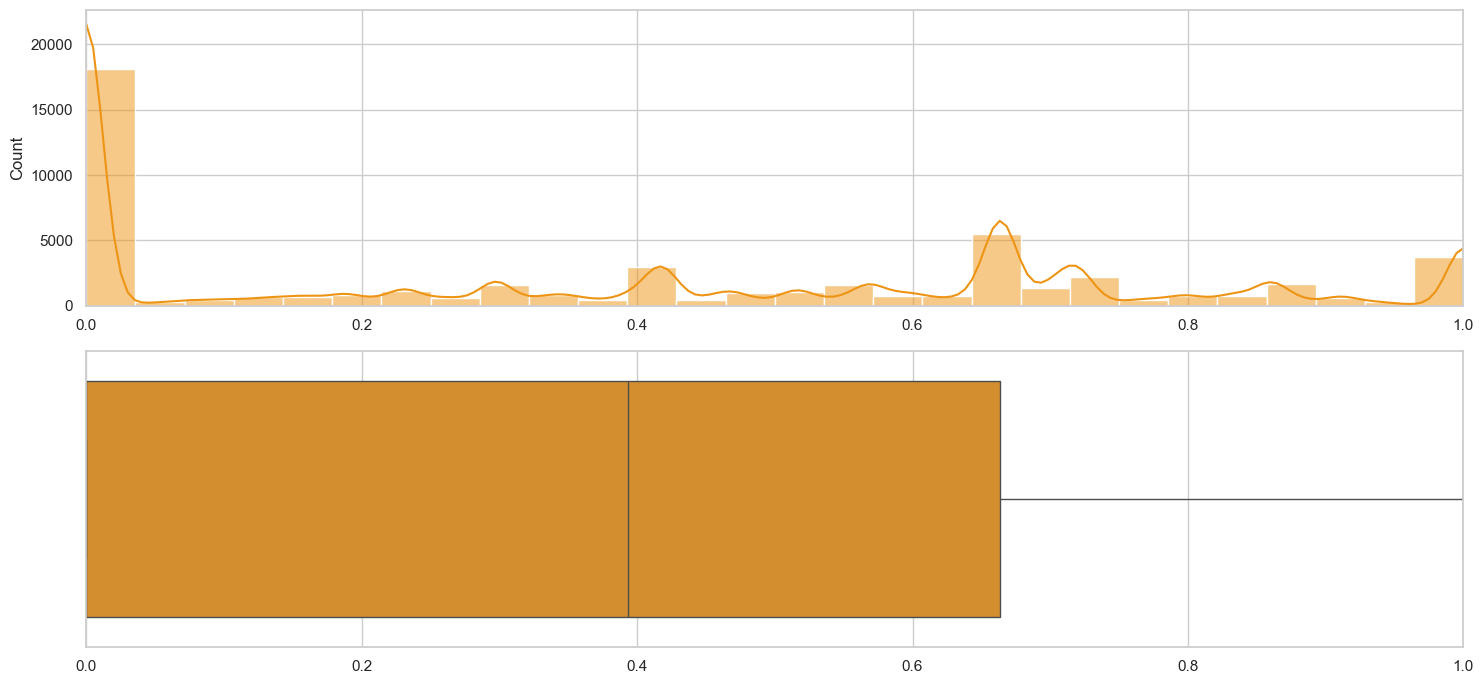

**PCT_TL_CLOSED_PCA**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.22
Std.dev: 0.31

Histograma y Boxplot de pct_tl_closed_pca.


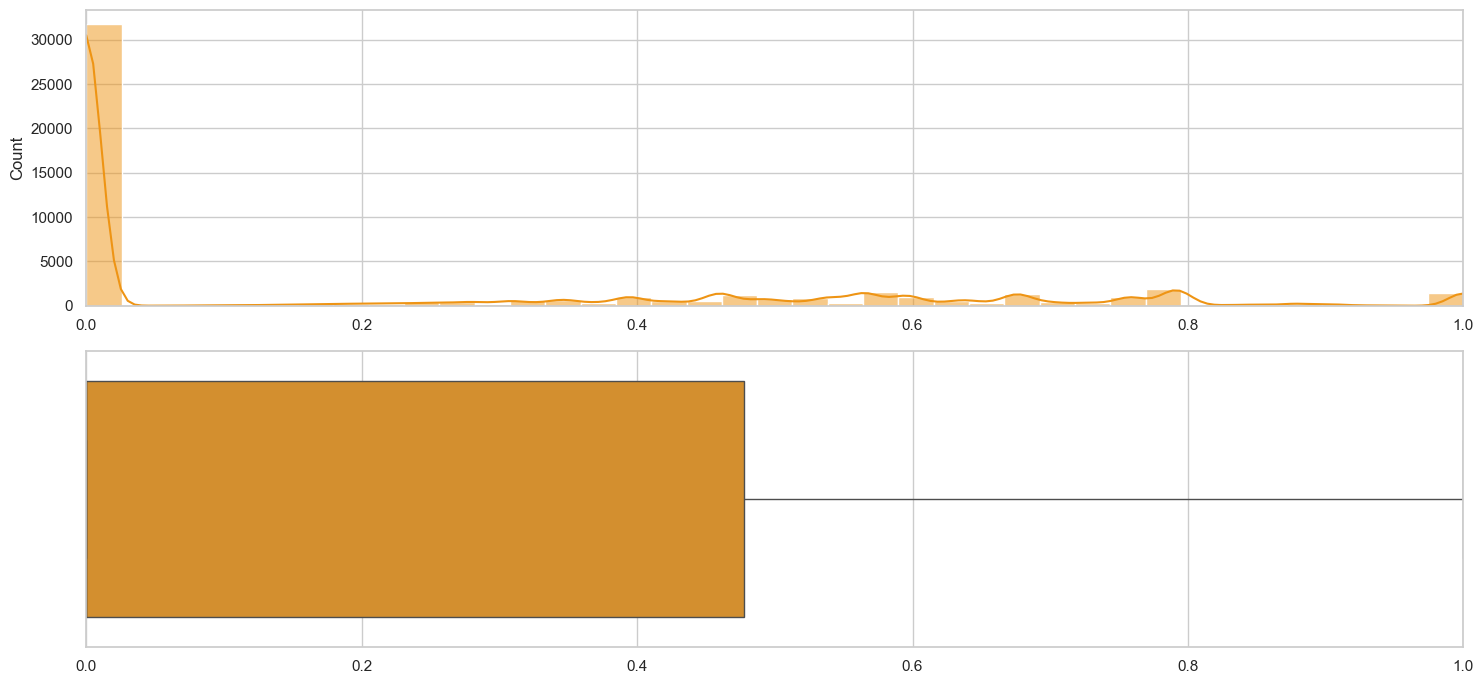

In [22]:
# Itera sobre las varáibles numericas para aplicar la función
for v_num in numeric_features:
    Count_Quant(internal, v_num)

## 4. Análisis Bivariante

### 4.1. Estudio de las correlaciones

Para el análisis de las correlaciones, emplearemos dos métodos distintos. En primer lugar, utilizaremos la correlación de Pearson, que nos permitirá identificar las relaciones lineales entre las variables. Posteriormente, recurriremos al método de Spearman, el cual es más adecuado para detectar relaciones no lineales. Con el fin de controlar las posibles multicolinealidades, aplicaremos un filtro moderado, estableciendo un umbral de 0.85, para evitar la presencia de correlaciones excesivas que puedan distorsionar los resultados del modelo.

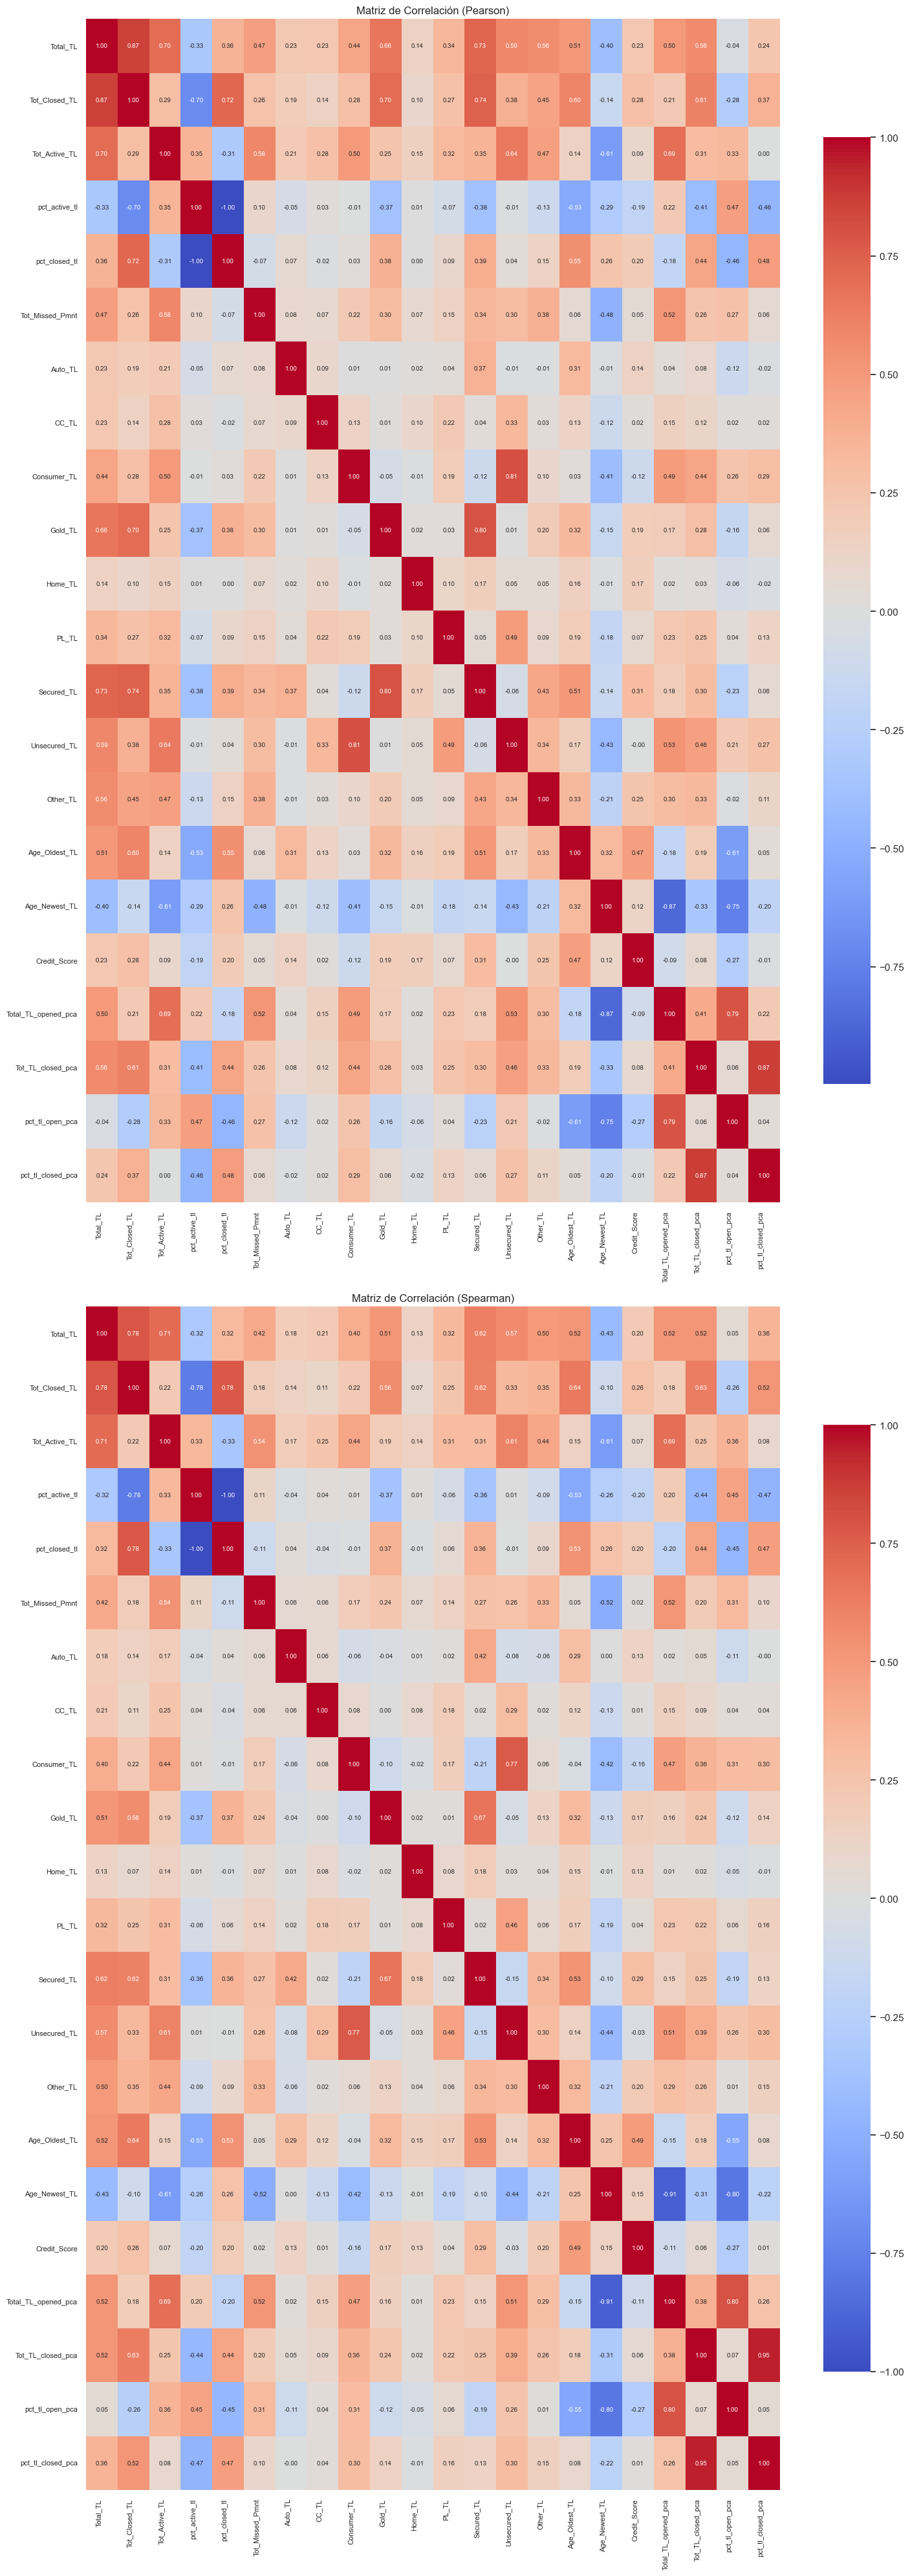

In [24]:
# Lista de métodos de correlación
methods = ['pearson', 'spearman']

# Configuración de la figura: 3 filas, 1 columna
fig, axes = plt.subplots(2, 1, figsize=(15, 40), sharey=True)

# Iterar sobre los métodos y generar las matrices de correlación
for i, method in enumerate(methods):
    # Calcular la matriz de correlación
    correlation_matrix = internal[numeric_features].corr(method=method)
    
    # Crear el heatmap
    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        cmap='coolwarm', 
        fmt='.2f', 
        ax=axes[i], 
        annot_kws={'size': 7}, 
        cbar_kws={'shrink': 0.8} 
    )
    
    # Personalizar etiquetas de los ejes
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=8)
    axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0, fontsize=8)
    axes[i].set_title(f'Matriz de Correlación ({method.capitalize()})', fontsize=12)

# Ajustar el diseño general de la figura
plt.tight_layout()

# Mostrar la figura
plt.show()

In [25]:
# Definir el umbral de correlación y lista de métodos
threshold = 0.79
methods = ['pearson', 'spearman']

# Crear una máscara de correlaciones combinadas
correlation_matrix = np.zeros((len(numeric_features), len(numeric_features)))

for met in methods:
    corr_mat = internal[numeric_features].corr(method=met).abs()
    correlation_matrix = np.maximum(correlation_matrix, corr_mat)

# Crear DataFrame de la matriz combinada
correlation_df = pd.DataFrame(correlation_matrix, index=numeric_features, columns=numeric_features)

# Identificar y eliminar columnas con alta correlación
columns_to_drop = set()
while True:
    # Encontrar la variable con más correlaciones altas
    high_corr = (correlation_df > threshold) & (correlation_df != 1.0)
    high_corr_sum = high_corr.sum().sort_values(ascending=False)

    if high_corr_sum.max() == 0:
        break

    # Eliminar la variable más problemática (con más correlaciones altas)
    col_to_remove = high_corr_sum.idxmax()
    columns_to_drop.add(col_to_remove)
    
    # Eliminar la columna y fila de la matriz de correlación
    correlation_df.drop(index=col_to_remove, columns=col_to_remove, inplace=True)

print(f'Tamaño original: {internal.shape}')
print(f'Columnas a eliminar: {columns_to_drop}')

# Eliminar columnas en el DataFrame
internal = internal.drop(columns=columns_to_drop)

print(f'Tamaño después de filtrar: {internal.shape}')

Tamaño original: (51336, 23)
Columnas a eliminar: {'pct_tl_closed_pca', 'Total_TL', 'Gold_TL', 'pct_tl_open_pca', 'Unsecured_TL', 'Total_TL_opened_pca'}
Tamaño después de filtrar: (51336, 17)


### 4.2. Target VS Variables Independientes

In [26]:
# Volvemos a crear la variable que recoge las características numéricas
numeric_features = internal.drop(['PROSPECTID', 'Credit_Score'], axis=1).columns

In [27]:
def Analyze_Numeric_Features_Scatter(df, num_features, target_column, hue_column=None):
    '''
    Analiza variables numéricas respecto a una variable objetivo numérica
    mediante scatter plots con una línea de regresión lineal.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - num_features: Lista de variables numéricas en el DataFrame.
    - target_column: Nombre de la variable objetivo numérica.
    - hue_column: (Opcional) Nombre de la variable categórica para definir el color de los puntos.
    '''
    
    print(f"Análisis de variables numéricas respecto a la columna objetivo '{target_column}':\n")
    
    for v_num in num_features:
        if v_num == target_column:
            continue
        
        plt.figure(figsize=(10, 6))
        
        # Graficar scatter plot, con color definido por la variable categórica si se proporciona
        sns.scatterplot(x=df[v_num], y=df[target_column], alpha=0.6, hue=df[hue_column] if hue_column else None)
        
        # Regresión lineal
        model = LinearRegression()
        model.fit(df[[v_num]], df[target_column])
        y_pred = model.predict(df[[v_num]])
        
        # Graficar la línea de regresión lineal
        plt.plot(df[v_num], y_pred, color='red', linestyle='--', label='Regresión lineal')
        
        # Configurar el gráfico
        plt.title(f"Relación entre {v_num} y {target_column}")
        plt.xlabel(v_num)
        plt.ylabel(target_column)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()


In [33]:
from sklearn.linear_model import LinearRegression

Análisis de variables numéricas respecto a la columna objetivo 'Credit_Score':



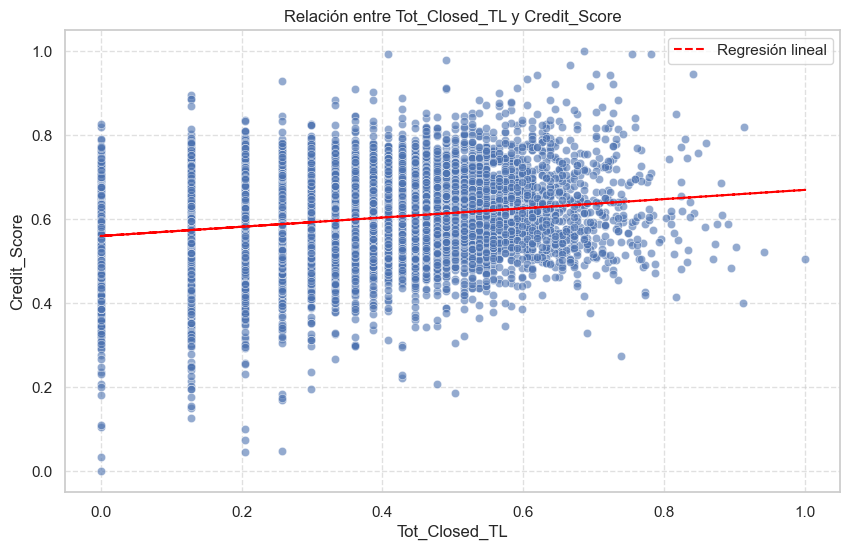

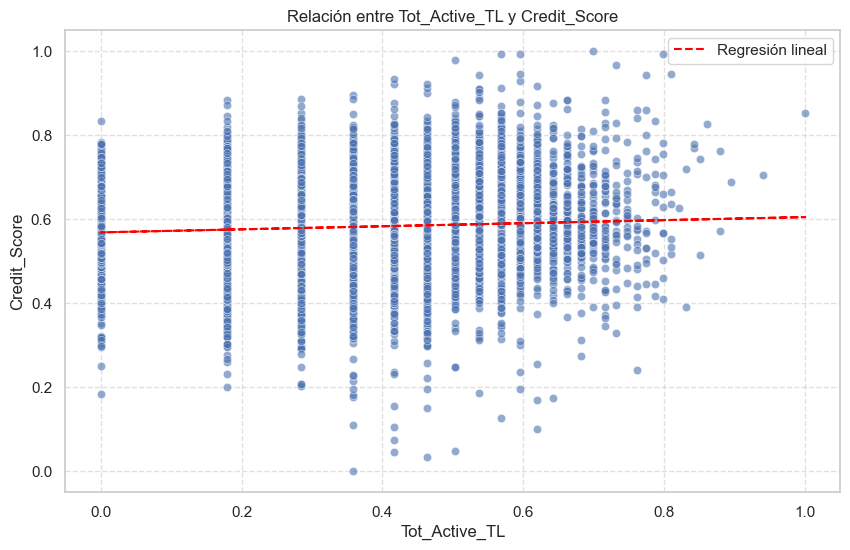

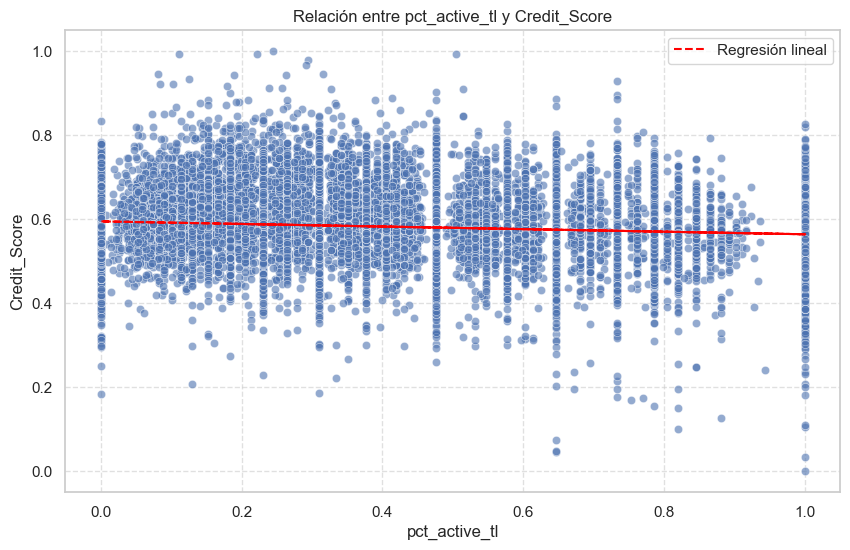

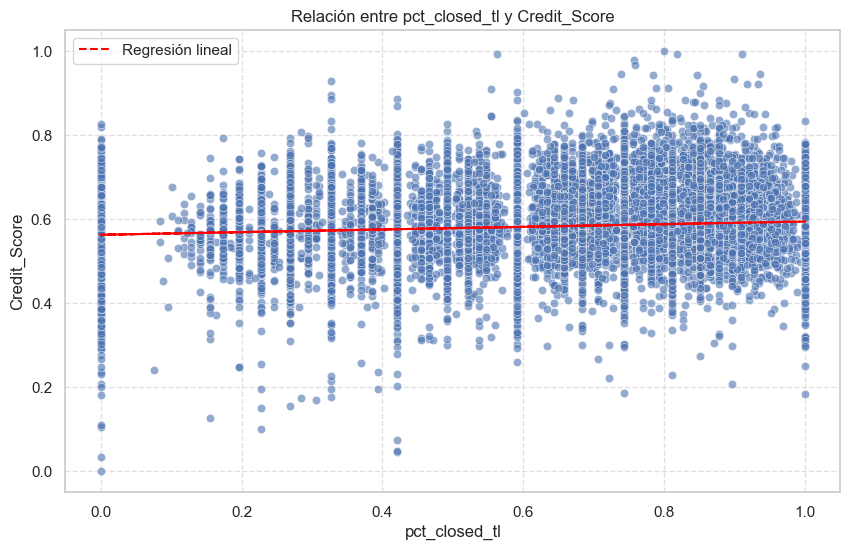

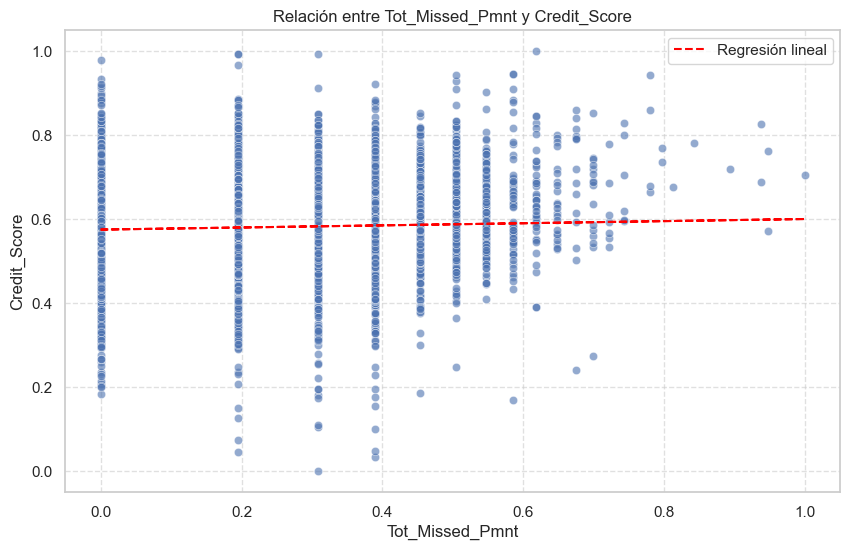

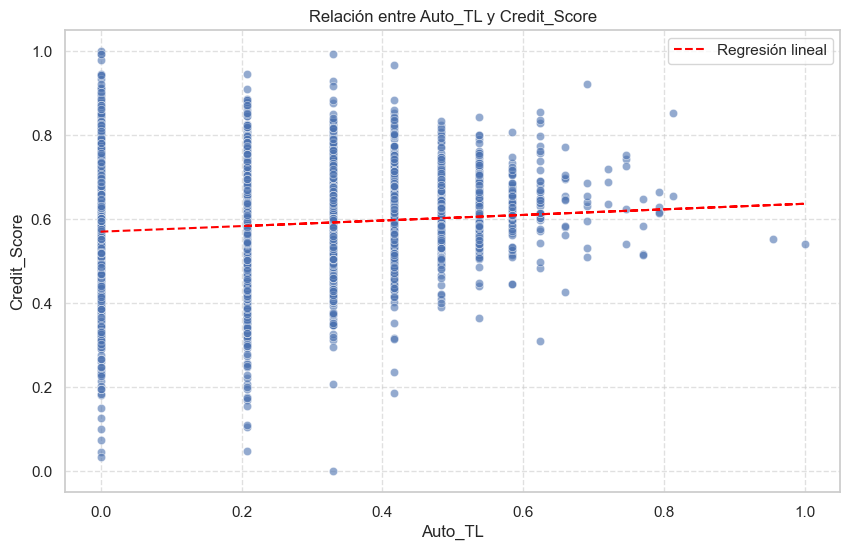

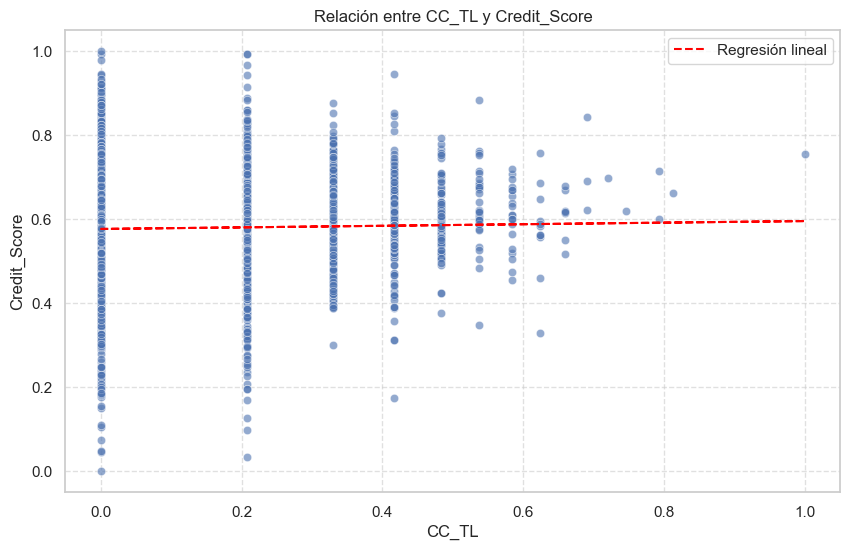

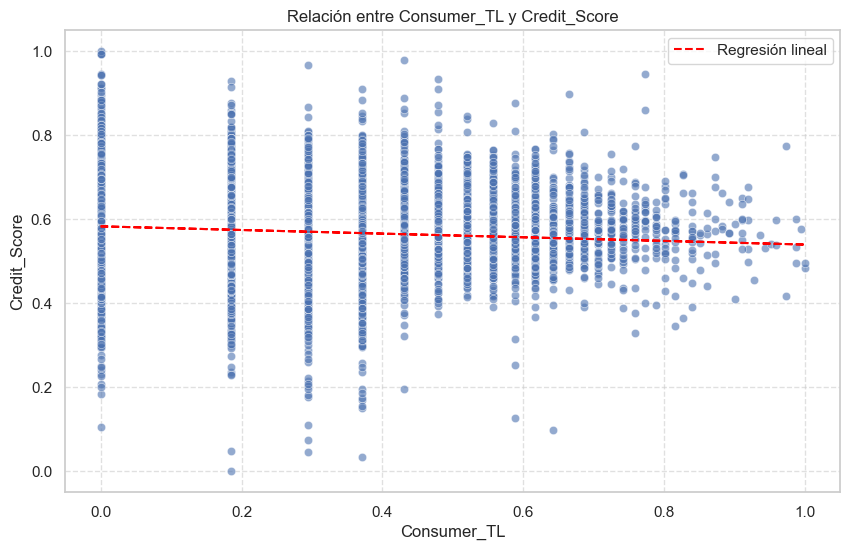

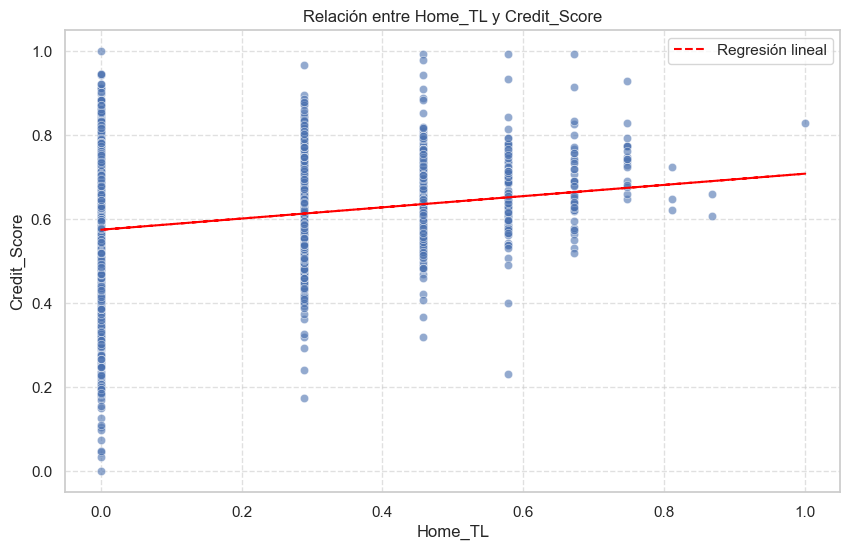

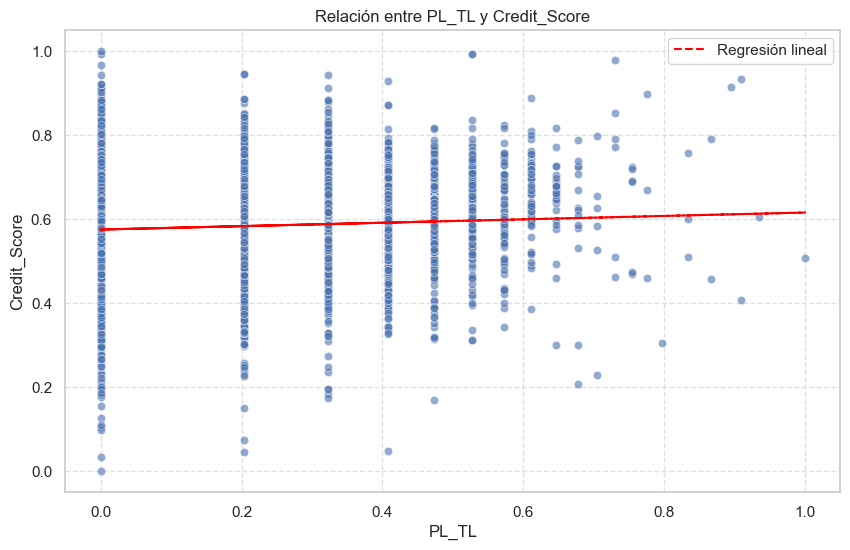

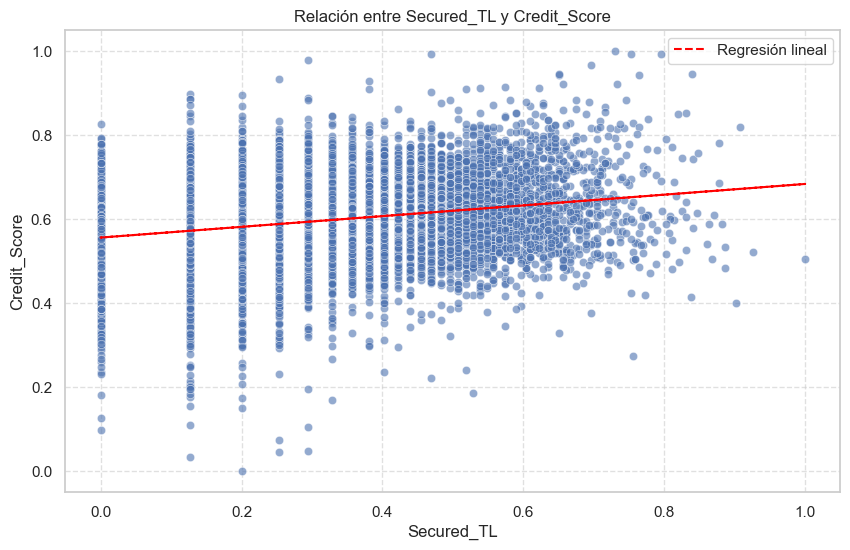

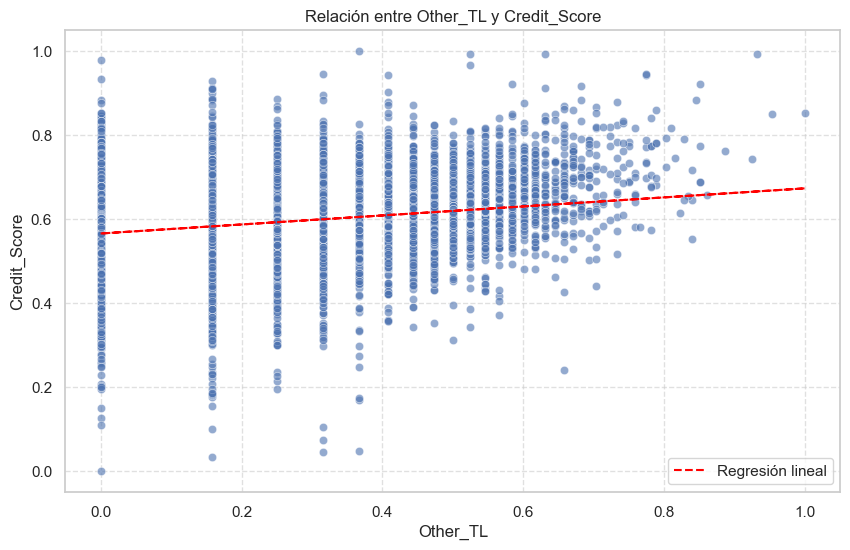

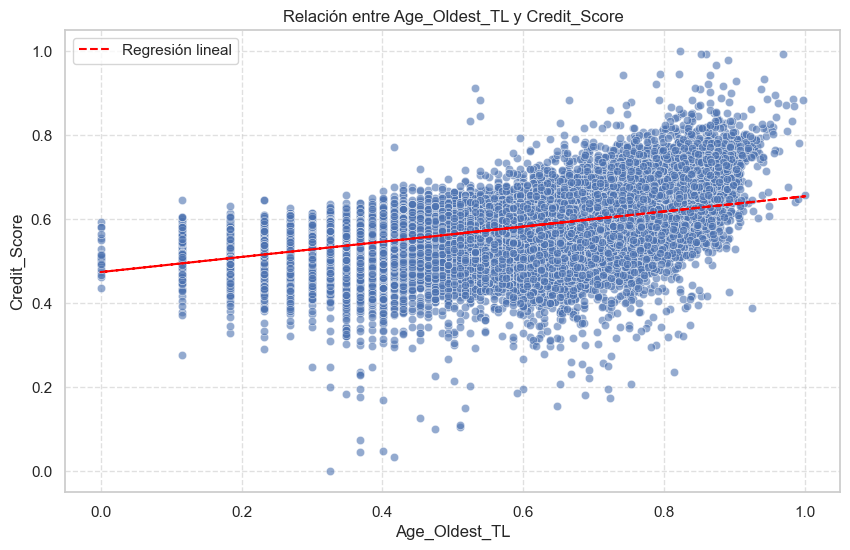

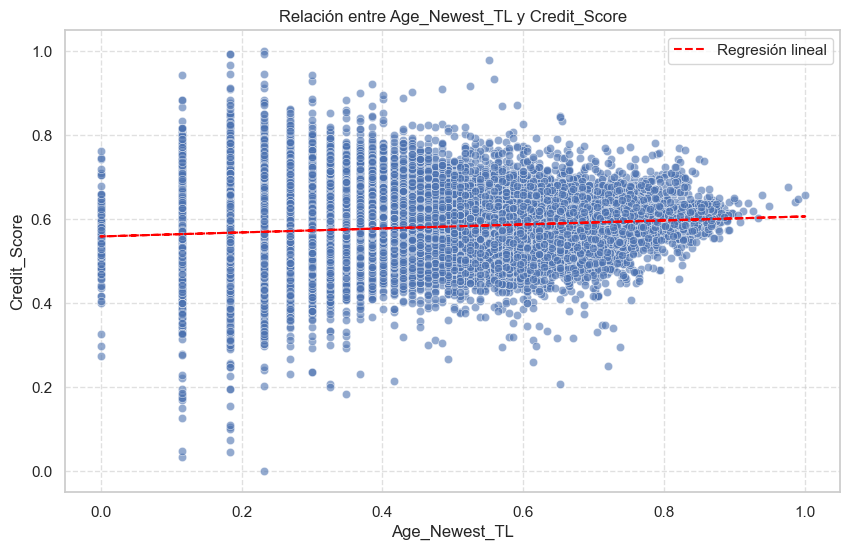

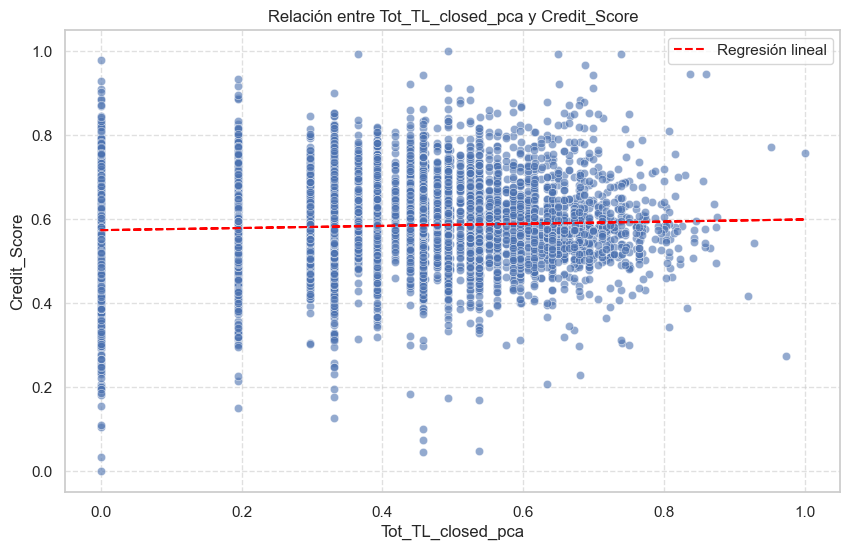

In [34]:
Analyze_Numeric_Features_Scatter(internal, numeric_features, 'Credit_Score')